In [1]:
#!pip install statsmodels
from __future__ import division
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

In [2]:
df = pd.read_csv("./resources/Books.csv")

In [3]:
df['Awards'] = df['Awards'].fillna(0)

In [4]:
max_awards = df['Awards'].max()
min_awards = df['Awards'].min()
range_of_awards = max_awards - min_awards

df['minmax_norm_awards'] = round(1 + 9*((df['Awards'] - min_awards)/range_of_awards) , 3)

mean_awards = df['Awards'].mean()

df['mean_norm_awards'] = round(1 + 9*((df['Awards'] - mean_awards)/range_of_awards) , 3)

In [5]:
df["Ratings"] = df["Rating Value"]
df.drop(['Rating Value'], axis=1)

,Unnamed: 0,Title,Author,Rating Count,Review Count,N pag,1st Pub,series,Genres,Awards,minmax_norm_ratings,mean_norm_ratings,Link,minmax_norm_awards,mean_norm_awards,Ratings
0,0,To Kill a Mockingbird,Harper Lee,4629082,92962,324.0,1960.0,1,"['Classics', 'Fiction', 'Historical']",4.0,7.705,7.448889,https://www.goodreads.com/book/show/2657.To_Ki...,2.286,1.786,4.28
1,1,1984,George Orwell,3250211,72375,237.0,1949.0,0,"['Classics', 'Fiction', 'Science Fiction']",2.0,7.161,6.845556,https://www.goodreads.com/book/show/40961427-1984,1.643,1.144,4.19
2,2,The Great Gatsby,F. Scott Fitzgerald,3877685,68965,200.0,1925.0,0,"['Classics', 'Fiction', 'Academic']",1.0,5.591,5.100000,https://www.goodreads.com/book/show/3.Harry_Po...,1.321,0.822,3.93
3,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,7281482,115354,309.0,1997.0,1,"['Fantasy', 'Fiction', 'Young Adult']",28.0,8.913,8.791111,https://www.goodreads.com/book/show/4671.The_G...,10.000,9.501,4.48
4,4,"The Hobbit, or There and Back Again",J.R.R. Tolkien,2973224,49547,366.0,1937.0,1,"['Fantasy', 'Classics', 'Fiction']",3.0,7.705,7.448889,https://www.goodreads.com/book/show/170448.Ani...,1.964,1.465,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,991,The Snows of Kilimanjaro and Other Stories,Ernest Hemingway,33823,1453,144.0,1961.0,0,"['Fiction', 'Short Stories', 'Classics']",0.0,5.228,4.697778,https://www.goodreads.com/book/show/244261.The...,1.000,0.501,3.87
992,992,The Street of Crocodiles,Bruno Schulz,7034,599,160.0,1933.0,0,"['Fiction', 'Short Stories', 'European Literat...",2.0,6.799,6.442222,https://www.goodreads.com/book/show/4645.The_S...,1.643,1.144,4.13
993,993,Riddley Walker,Russell Hoban,7075,819,256.0,1980.0,0,"['Fiction', 'Science Fiction', 'Apocalyptic']",3.0,6.134,5.704444,https://www.goodreads.com/book/show/428.Play_I...,1.964,1.465,4.02
994,994,Play It As It Lays,Joan Didion,29879,2278,231.0,1970.0,0,"['Fiction', 'Classics', 'Novels']",0.0,5.289,4.764444,https://www.goodreads.com/book/show/776573.Rid...,1.000,0.501,3.88


In [6]:
sample_books = df.sample(n = 100)

In [7]:
sample_books

,Unnamed: 0,Title,Author,Rating Count,Review Count,Rating Value,N pag,1st Pub,series,Genres,Awards,minmax_norm_ratings,mean_norm_ratings,Link,minmax_norm_awards,mean_norm_awards,Ratings
821,821,Rabbit Redux,John Updike,14013,757,3.80,440.0,1971.0,1,"['Fiction', 'Classics', 'Literature']",1.0,4.805,4.227778,https://www.goodreads.com/book/show/46917.Rabb...,1.321,0.822,3.80
814,814,Emily of New Moon,L.M. Montgomery,43862,1894,4.08,339.0,1923.0,1,"['Classics', 'Fiction', 'Young Adult']",0.0,6.497,6.106667,https://www.goodreads.com/book/show/32979.The_...,1.000,0.501,4.08
428,428,The Complete Stories,Flannery O'Connor,36160,1739,4.40,555.0,1955.0,0,"['Short Stories', 'Fiction', 'Classics']",1.0,8.430,8.254444,https://www.goodreads.com/book/show/65641.The_...,1.321,0.822,4.40
323,323,"Rabbit, Run",John Updike,55671,3332,3.58,325.0,1960.0,1,"['Fiction', 'Classics', 'Novels']",1.0,3.477,2.751111,https://www.goodreads.com/book/show/85386.Rabb...,1.321,0.822,3.58
508,508,Collected Poems,W.H. Auden,5954,86,4.28,960.0,1945.0,0,"['Poetry', 'Classics', 'Literature']",0.0,7.705,7.448889,https://www.goodreads.com/book/show/321538.Col...,1.000,0.501,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,178,If on a Winter's Night a Traveler,Italo Calvino,76473,6221,4.05,260.0,1979.0,0,"['Fiction', 'Classics', 'European Literature']",2.0,6.315,5.905556,https://www.goodreads.com/book/show/3985.The_A...,1.643,1.144,4.05
155,155,The House of Mirth,Edith Wharton,86245,4693,3.94,351.0,1905.0,0,"['Classics', 'Fiction', 'Historical']",0.0,5.651,5.167778,https://www.goodreads.com/book/show/76778.The_...,1.000,0.501,3.94
410,410,The New York Trilogy,Paul Auster,63845,3383,3.87,308.0,1987.0,1,"['Fiction', 'Mystery', 'Literature']",0.0,5.228,4.697778,https://www.goodreads.com/book/show/3690.The_P...,1.000,0.501,3.87
970,970,Redeeming Love,Francine Rivers,218405,12013,4.50,479.0,1991.0,0,"['Christian Fiction', 'Christian', 'Fiction']",0.0,9.034,8.925556,https://www.goodreads.com/book/show/218427.Gat...,1.000,0.501,4.50


In [8]:
minmax_ratings_list = sample_books["minmax_norm_ratings"].tolist()
minmax_ratings_list.sort()
print(minmax_ratings_list)

[3.477, 3.477, 3.537, 3.839, 4.02, 4.141, 4.141, 4.624, 4.745, 4.805, 4.805, 4.805, 4.8660000000000005, 4.926, 5.047, 5.107, 5.167999999999999, 5.167999999999999, 5.228, 5.228, 5.228, 5.228, 5.228, 5.228, 5.289, 5.289, 5.349, 5.349, 5.349, 5.409, 5.409, 5.47, 5.53, 5.591, 5.651, 5.711, 5.772, 5.772, 5.893, 5.893, 5.893, 6.013, 6.074, 6.074, 6.074, 6.074, 6.1339999999999995, 6.195, 6.195, 6.255, 6.315, 6.315, 6.376, 6.376, 6.436, 6.436, 6.436, 6.497000000000001, 6.497000000000001, 6.497000000000001, 6.497000000000001, 6.497000000000001, 6.557, 6.557, 6.617000000000001, 6.7989999999999995, 6.7989999999999995, 6.919, 6.98, 6.98, 7.04, 7.101, 7.101, 7.101, 7.1610000000000005, 7.3420000000000005, 7.3420000000000005, 7.403, 7.403, 7.403, 7.462999999999999, 7.462999999999999, 7.523, 7.644, 7.644, 7.705, 7.705, 7.705, 7.765, 7.8260000000000005, 7.8260000000000005, 7.8260000000000005, 8.067, 8.067, 8.187999999999999, 8.369, 8.43, 8.732000000000001, 9.033999999999999, 9.517000000000001]


In [9]:
print(max(minmax_ratings_list))
print(min(minmax_ratings_list))

9.517000000000001
3.477


In [10]:
mean_ratings_norm = sample_books["mean_norm_ratings"].tolist()
mean_ratings_norm.sort()
print(mean_ratings_norm)

[2.751111111111111, 2.751111111111111, 2.818888888888889, 3.1544444444444437, 3.355555555555555, 3.49, 3.49, 4.026666666666666, 4.161111111111111, 4.227777777777779, 4.227777777777779, 4.227777777777779, 4.2955555555555565, 4.362222222222221, 4.496666666666666, 4.5633333333333335, 4.63111111111111, 4.63111111111111, 4.6977777777777785, 4.6977777777777785, 4.6977777777777785, 4.6977777777777785, 4.6977777777777785, 4.6977777777777785, 4.764444444444443, 4.764444444444443, 4.832222222222222, 4.832222222222222, 4.832222222222222, 4.898888888888889, 4.898888888888889, 4.966666666666667, 5.033333333333333, 5.1, 5.167777777777777, 5.234444444444444, 5.3022222222222215, 5.3022222222222215, 5.4355555555555535, 5.4355555555555535, 5.4355555555555535, 5.5699999999999985, 5.637777777777778, 5.637777777777778, 5.637777777777778, 5.637777777777778, 5.704444444444443, 5.771111111111112, 5.771111111111112, 5.838888888888889, 5.905555555555555, 5.905555555555555, 5.973333333333333, 5.973333333333333, 

In [11]:
print(max(mean_ratings_norm))
print(min(mean_ratings_norm))

9.463333333333333
2.751111111111111


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

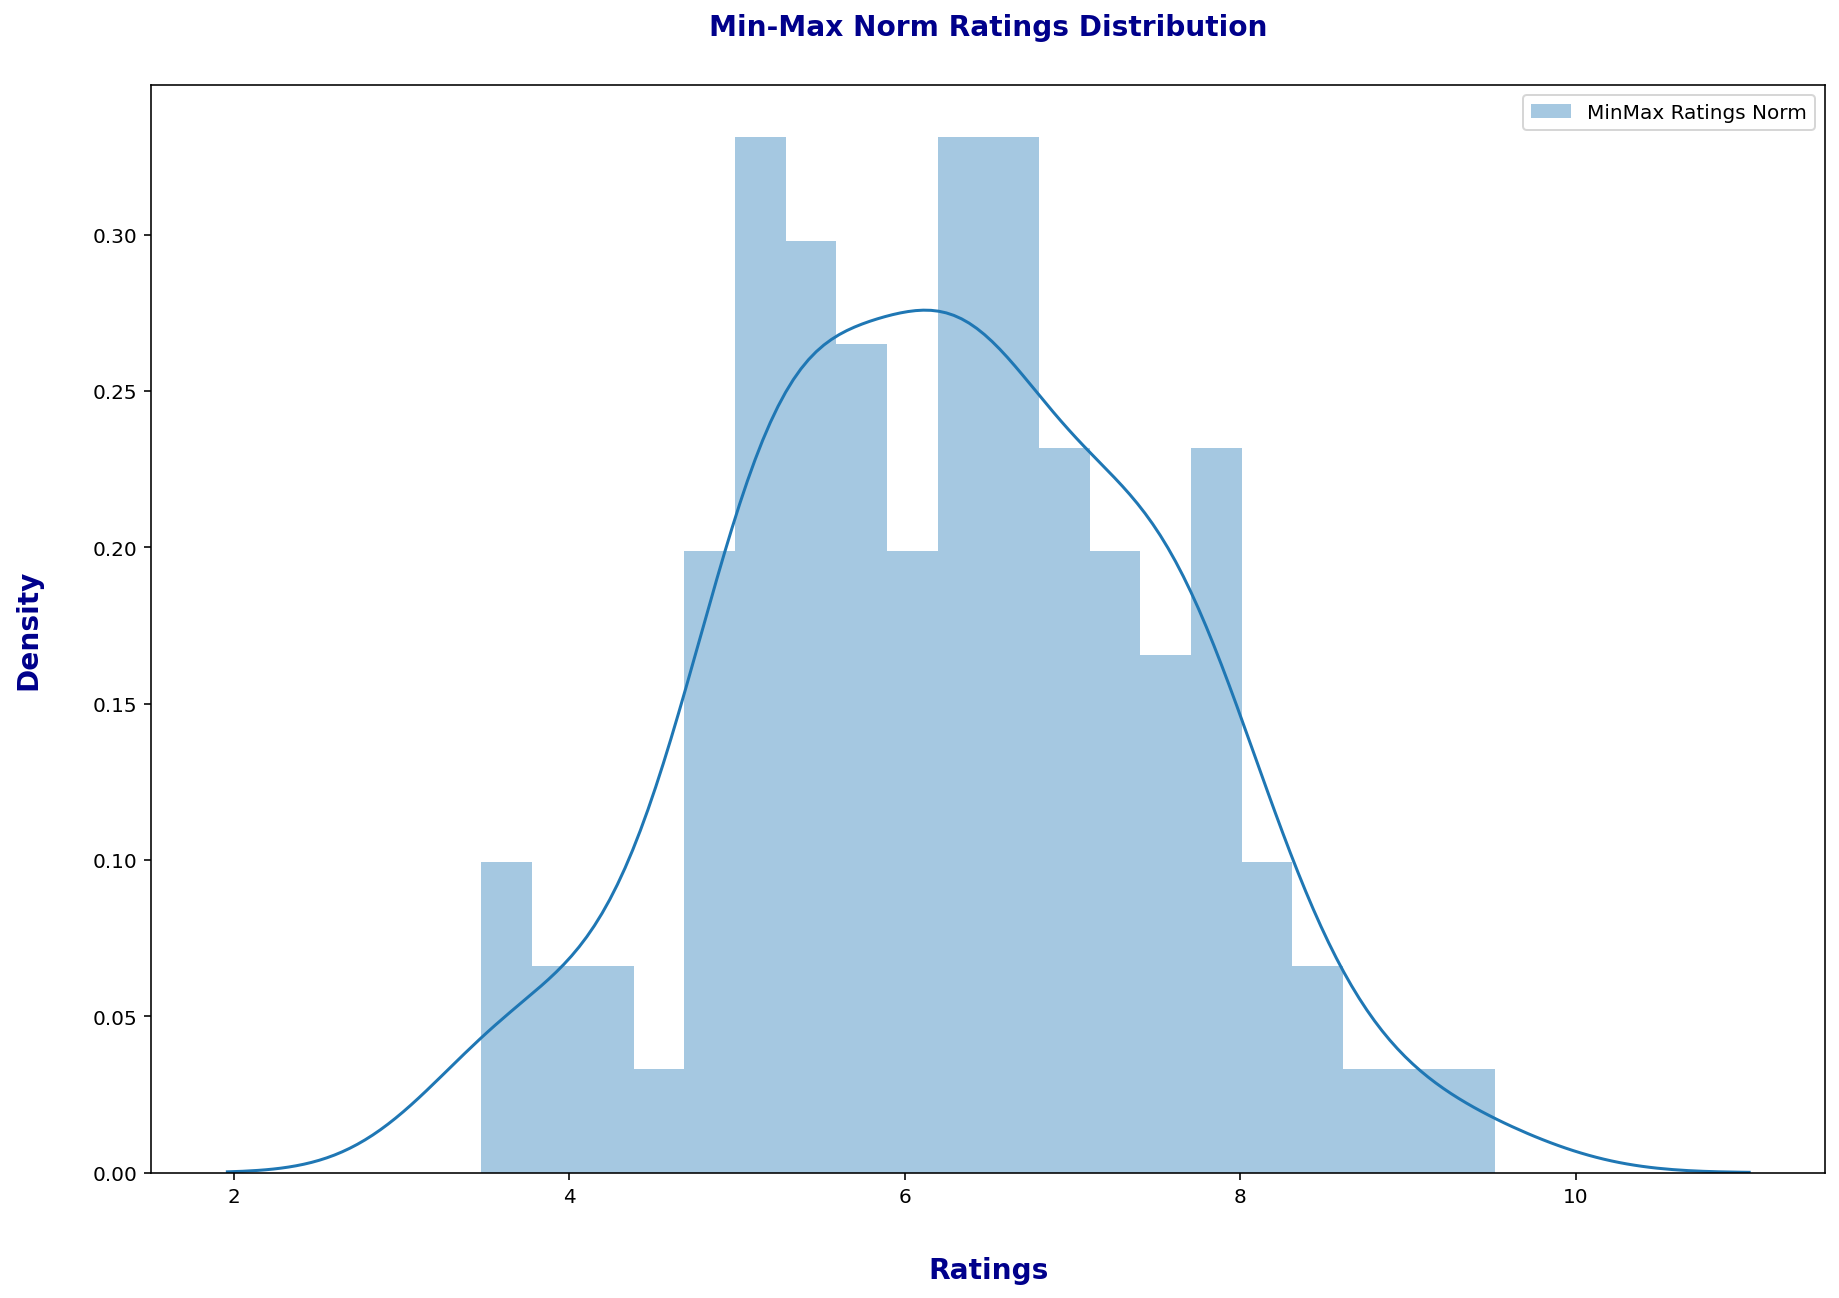

In [12]:
# Distribution plot of minmax normal distribution
plt.figure(figsize=(15,10))
sns.distplot(minmax_ratings_list, label='MinMax Ratings Norm', bins=20)
c=plt.legend()
plt.xlabel('Ratings', labelpad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Density', labelpad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.title('Min-Max Norm Ratings Distribution', pad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.savefig('minmax_ratings_norm.jpg')
plt.tight_layout

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: MatplotlibDeprecationWarning: print_figure() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


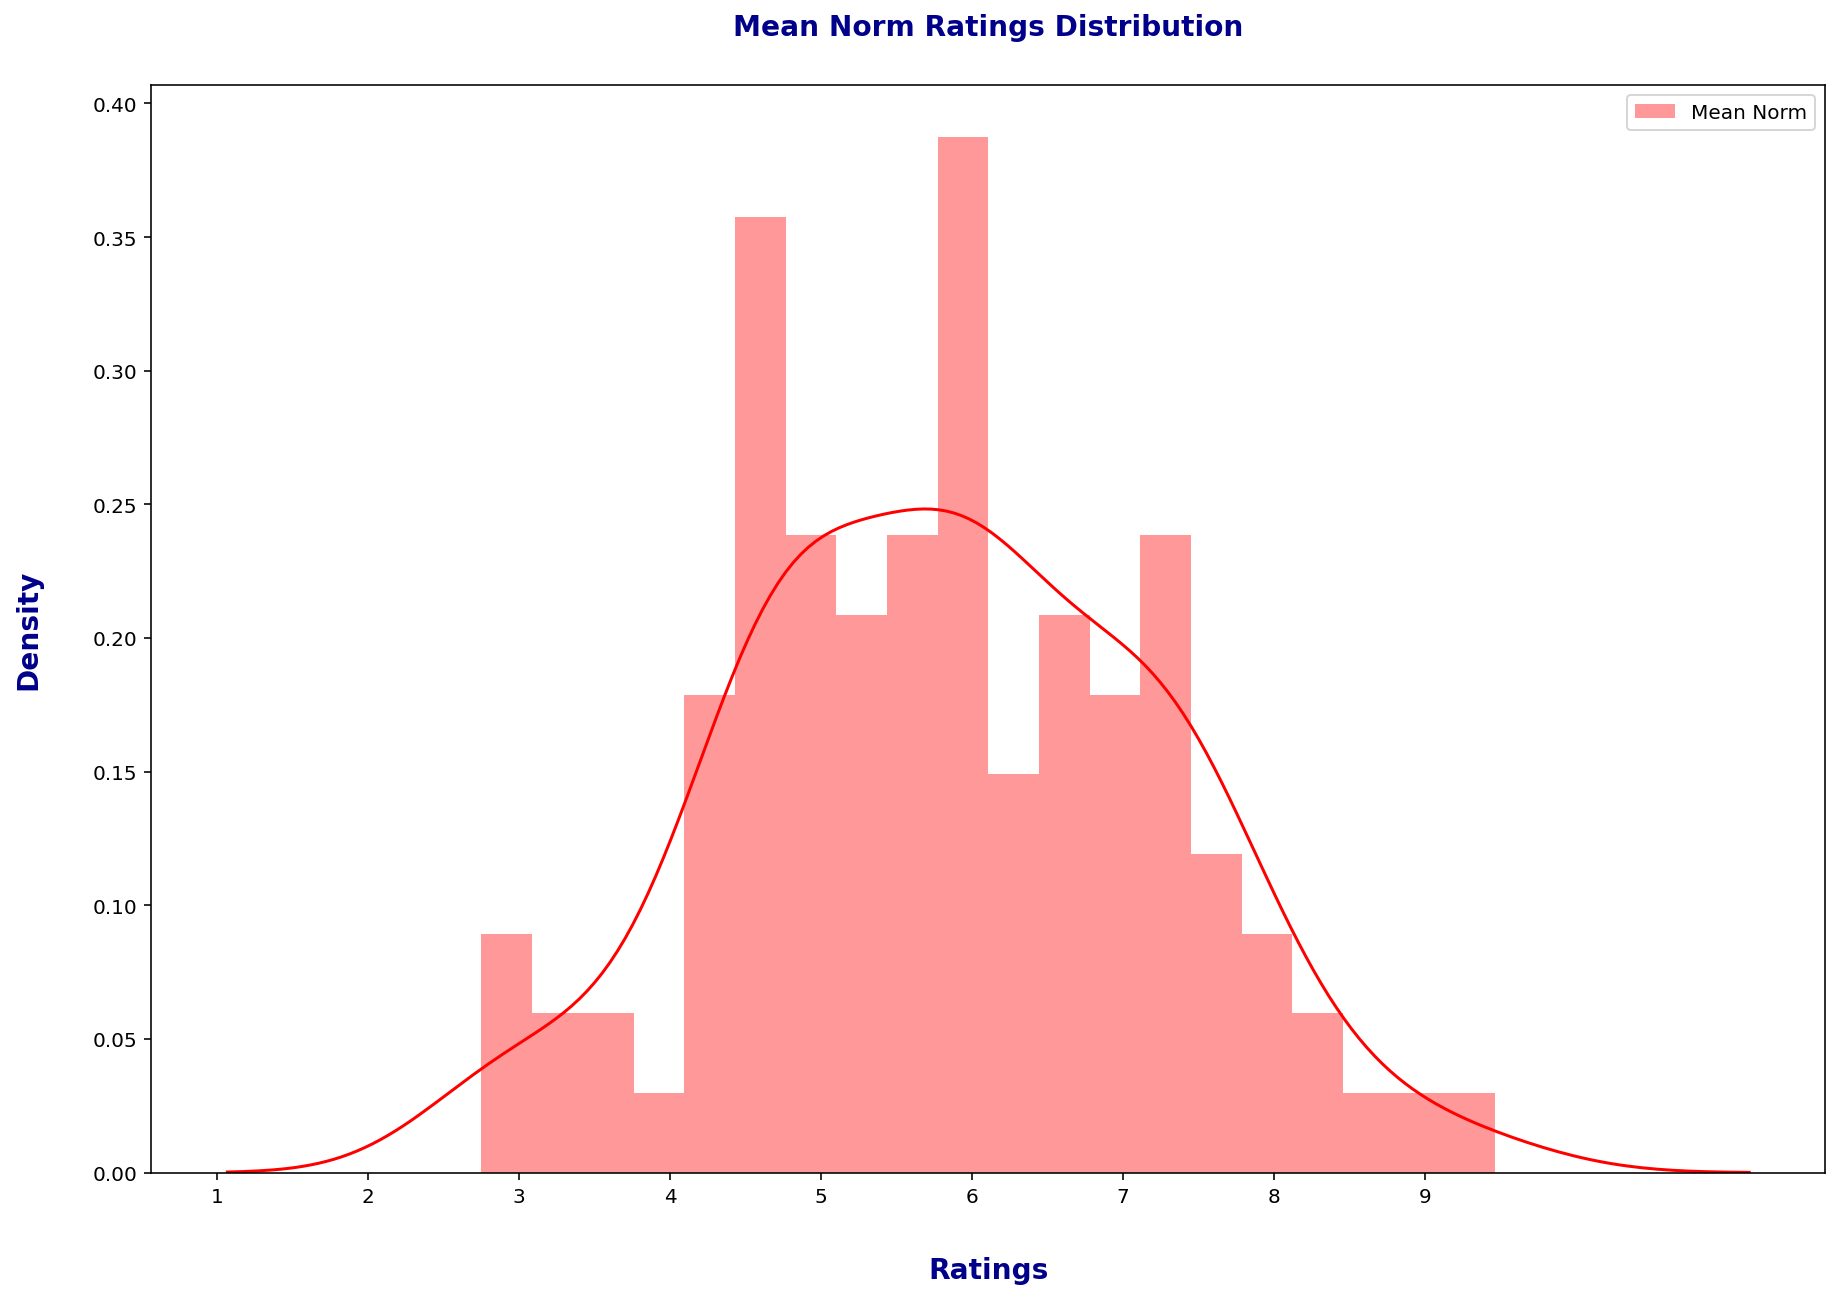

In [13]:
# Distribution plot of mean normal distribution
plt.figure(figsize=(15,10))
sns.distplot(mean_ratings_norm, label='Mean Norm', color='red', bins=20)
c=plt.legend()
plt.xticks(range(1, 10))
plt.xlabel('Ratings', labelpad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Density', labelpad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.title('Mean Norm Ratings Distribution', pad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.savefig('mean_ratings_norm.jpg')

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: MatplotlibDeprecationWarning: print_figure() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
 

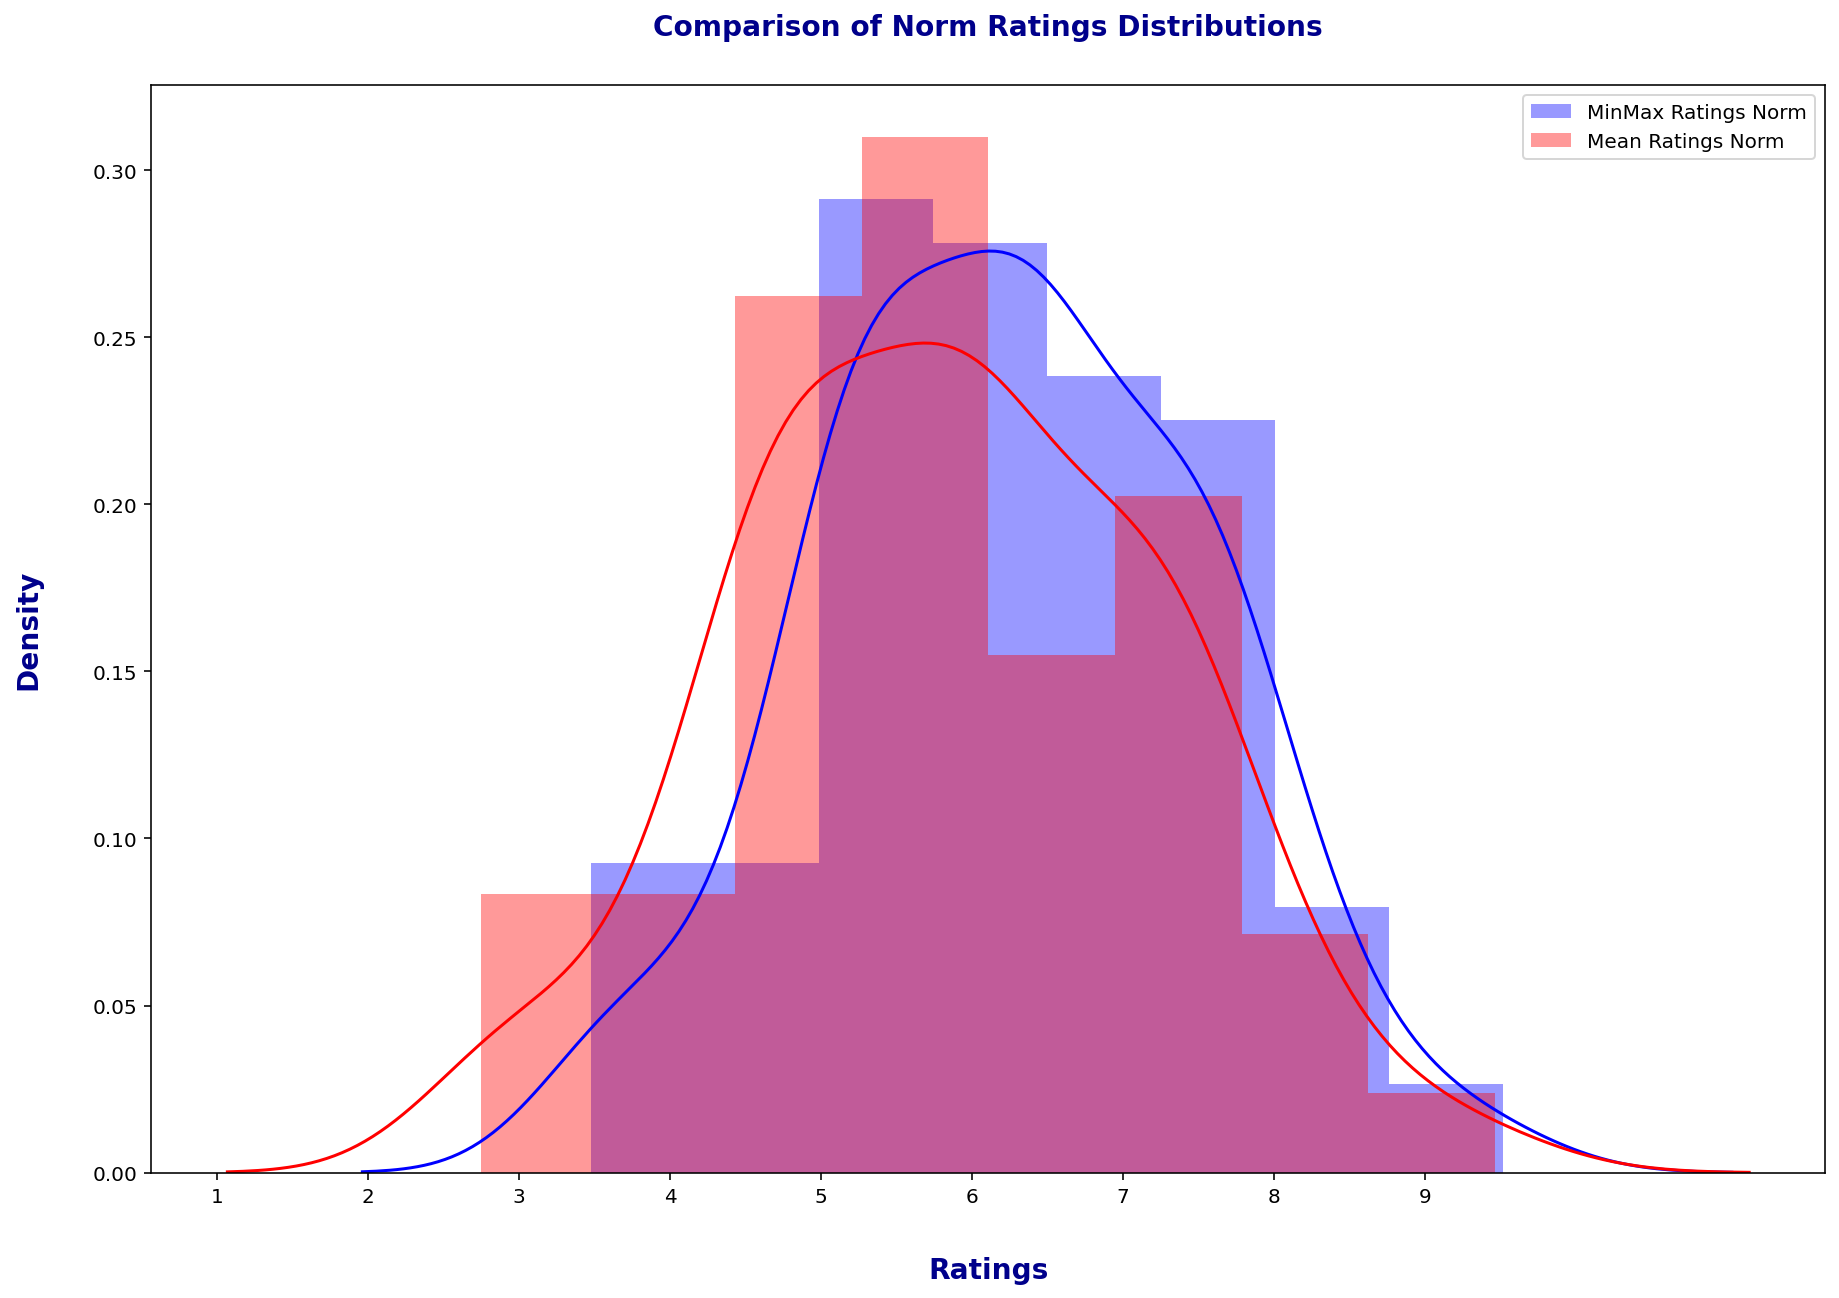

In [14]:
# Distribution plot of both normal distributions
plt.figure(figsize=(15,10))
sns.distplot(minmax_ratings_list, label='MinMax Ratings Norm', color='blue')
sns.distplot(mean_ratings_norm, label='Mean Ratings Norm', color='red')
c=plt.legend()
plt.xticks(range(1, 10))
plt.xlabel('Ratings', labelpad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Density', labelpad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.title('Comparison of Norm Ratings Distributions', pad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.savefig('norm_ratings_dists.jpg')


In [15]:
minmax_awards_list = sample_books["minmax_norm_awards"].tolist()
minmax_awards_list.sort()
print(minmax_awards_list)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.321, 1.643, 1.643, 1.643, 1.643, 1.643, 1.643, 1.643, 1.643, 1.643, 1.643, 1.643, 1.643, 1.643, 1.643, 1.964, 1.964, 1.964, 1.964, 1.964, 1.964, 2.286, 2.286, 2.286, 2.607, 2.607, 2.929, 2.929, 3.25, 3.25, 3.571, 3.893]


In [16]:
print(max(minmax_awards_list))
print(min(minmax_awards_list))

3.893
1.0


In [17]:
mean_awards_norm = sample_books["mean_norm_awards"].tolist()
mean_awards_norm.sort()
print(mean_awards_norm)

[0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.501, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 0.822, 1.144, 1.144, 1.144, 1.144, 1.144, 1.144, 1.144, 1.144, 1.144, 1.144, 1.144, 1.144, 1.144, 1.144, 1.465, 1.465, 1.465, 1.465, 1.465, 1.465, 1.786, 1.786, 1.786, 2.108, 2.108, 2.429, 2.429, 2.751, 2.751, 3.072, 3.394]


In [18]:
print(max(mean_awards_norm))
print(min(mean_awards_norm))

3.394
0.501


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: MatplotlibDeprecationWarning: print_figure() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
 

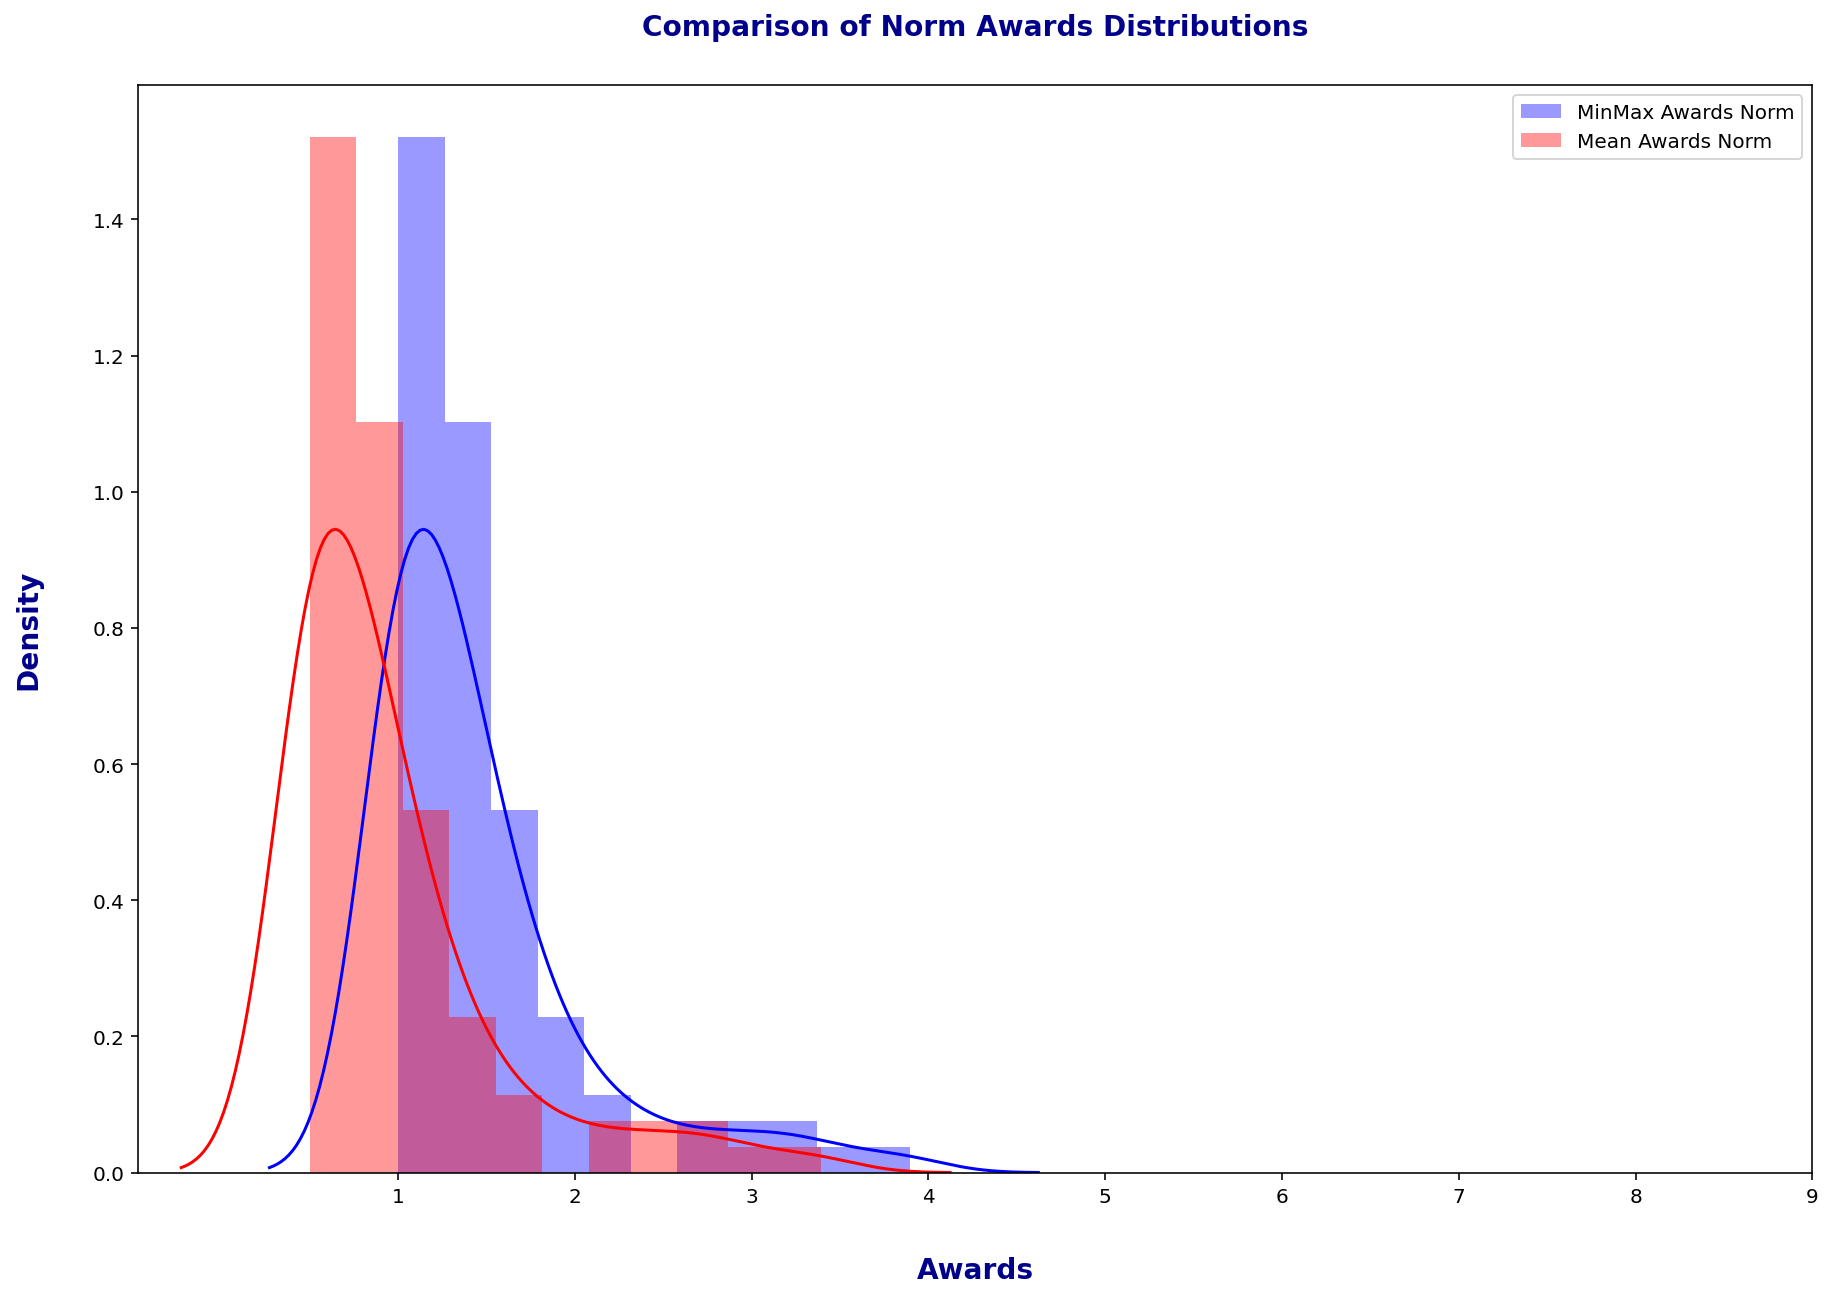

In [19]:
# Distribution plot of both normal distributions
plt.figure(figsize=(15,10))
sns.distplot(minmax_awards_list, label='MinMax Awards Norm', color='blue')
sns.distplot(mean_awards_norm, label='Mean Awards Norm', color='red')
c=plt.legend()
plt.xticks(range(1, 10))
plt.xlabel('Awards', labelpad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Density', labelpad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.title('Comparison of Norm Awards Distributions', pad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.savefig('norm_awards_dists.jpg')

In [20]:
"""
- describe meaning of skews - what does it show? -
dramatically less books with lots of awards.
roughly equal books with much higher and lower ratings.
therefore it is much less common for a book to get an award
or many awards than it is to get a dramatically different level of review.

"""

'\n- describe meaning of skews - what does it show? -\ndramatically less books with lots of awards.\nroughly equal books with much higher and lower ratings.\ntherefore it is much less common for a book to get an award\nor many awards than it is to get a dramatically different level of review.\n\n'

In [21]:
# PROBABILITY DENSITY FUNCTION

In [22]:
mean_awards = df.Awards.mean()
mean_awards

1.5532128514056225

In [23]:
mean_ratings = df.Ratings.mean()
mean_ratings

4.059738955823293

In [24]:
population_variance_awards = df.Awards.var(ddof=0)
sample_variance_awards = df.Awards.var() # ddof=1 by default in pandas

population_variance_awards, sample_variance_awards

(6.8837145771842385, 6.890632883291961)

In [25]:
population_variance_ratings = df.Ratings.var(ddof=0)
sample_variance_ratings = df.Ratings.var() # ddof=1 by default in pandas

population_variance_ratings, sample_variance_ratings

(0.04178667884388962, 0.04182867550604428)

In [26]:
population_std_awards = df.Awards.std(ddof=0)
sample_std_awards = df.Awards.std()

population_std_awards, sample_std_awards

(2.6236833988086747, 2.625001501578992)

In [27]:
population_std_ratings = df.Ratings.std(ddof=0)
sample_std_ratings = df.Ratings.std()

population_std_ratings, sample_std_ratings

(0.20441790245448077, 0.20452059922180035)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: MatplotlibDeprecationWarning: print_figure() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


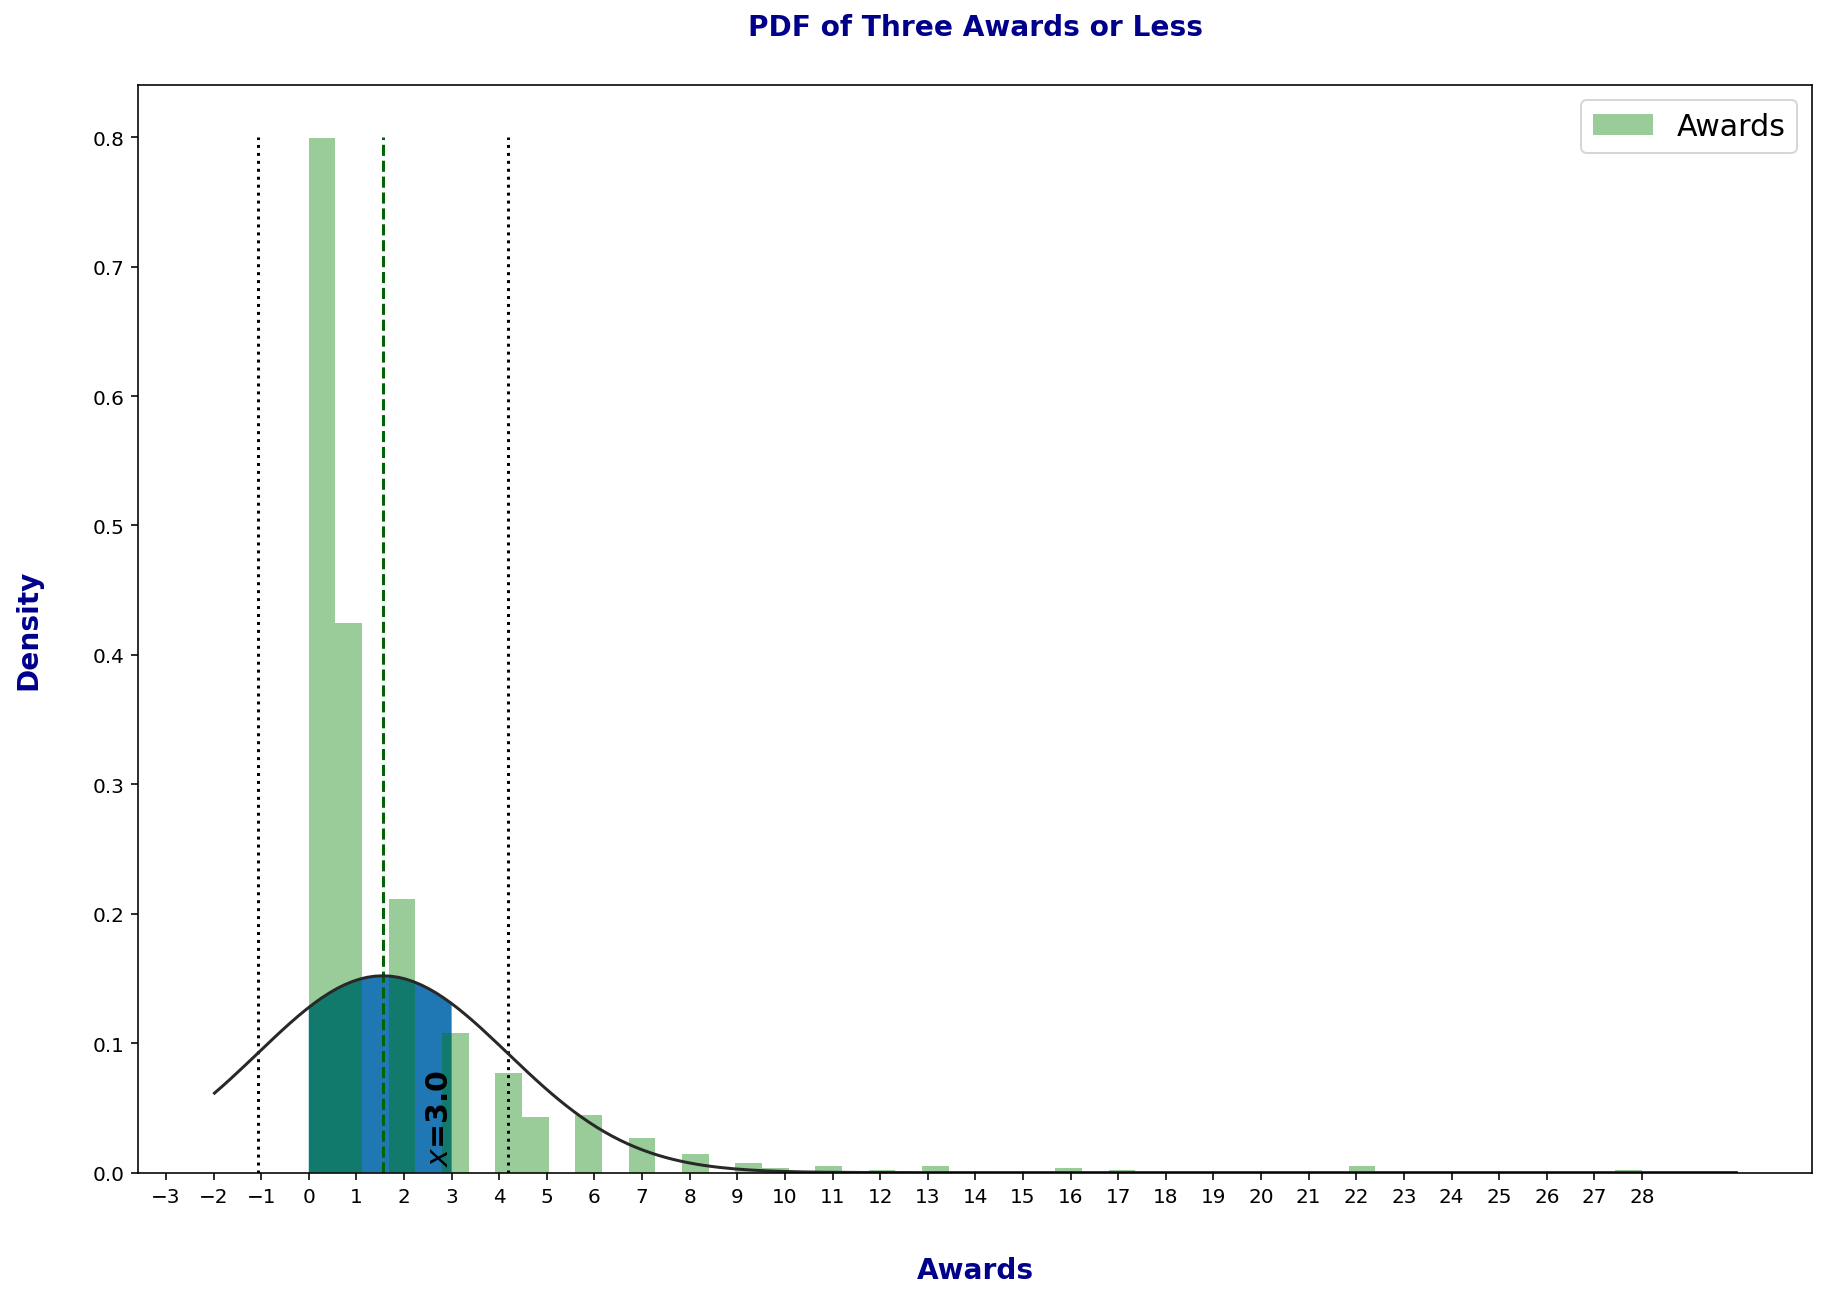

In [28]:
# First take a look at the pdf and especially the green area under
# the curve containing the probability of 3 awards or less.
plt.figure(figsize=(15,10))
x_awards = 3.0
sns.distplot(df["Awards"], label='Awards', kde=False, fit=stats.norm, color='green')
plt.text(x_awards-0.55, .01, '$x$='+str(x_awards), rotation='vertical', fontsize=15, fontweight='bold', color='black')
xplot_awards = np.linspace(min(df["Awards"]), x_awards, 10)
yplot_awards = stats.norm.pdf(xplot_awards, mean_awards, population_std_awards)
plt.fill_between(xplot_awards,  yplot_awards)
c=plt.legend(fontsize=15)
plt.xticks(range(-5, 29))
plt.vlines(x=mean_awards, ymin=0, ymax=0.8, colors='darkgreen', linestyles='dashed', label='mean')
plt.vlines(x=mean_awards+population_std_awards, ymin=0, ymax=0.8, colors='black', linestyles='dotted', label='SD')
plt.vlines(x=mean_awards-population_std_awards, ymin=0, ymax=0.8, colors='black', linestyles='dotted', label='SD')
plt.xlabel('Awards', labelpad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Density', labelpad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.title('PDF of Three Awards or Less', pad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.savefig('PDF_Awards.jpg')


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: MatplotlibDeprecationWarning: print_figure() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


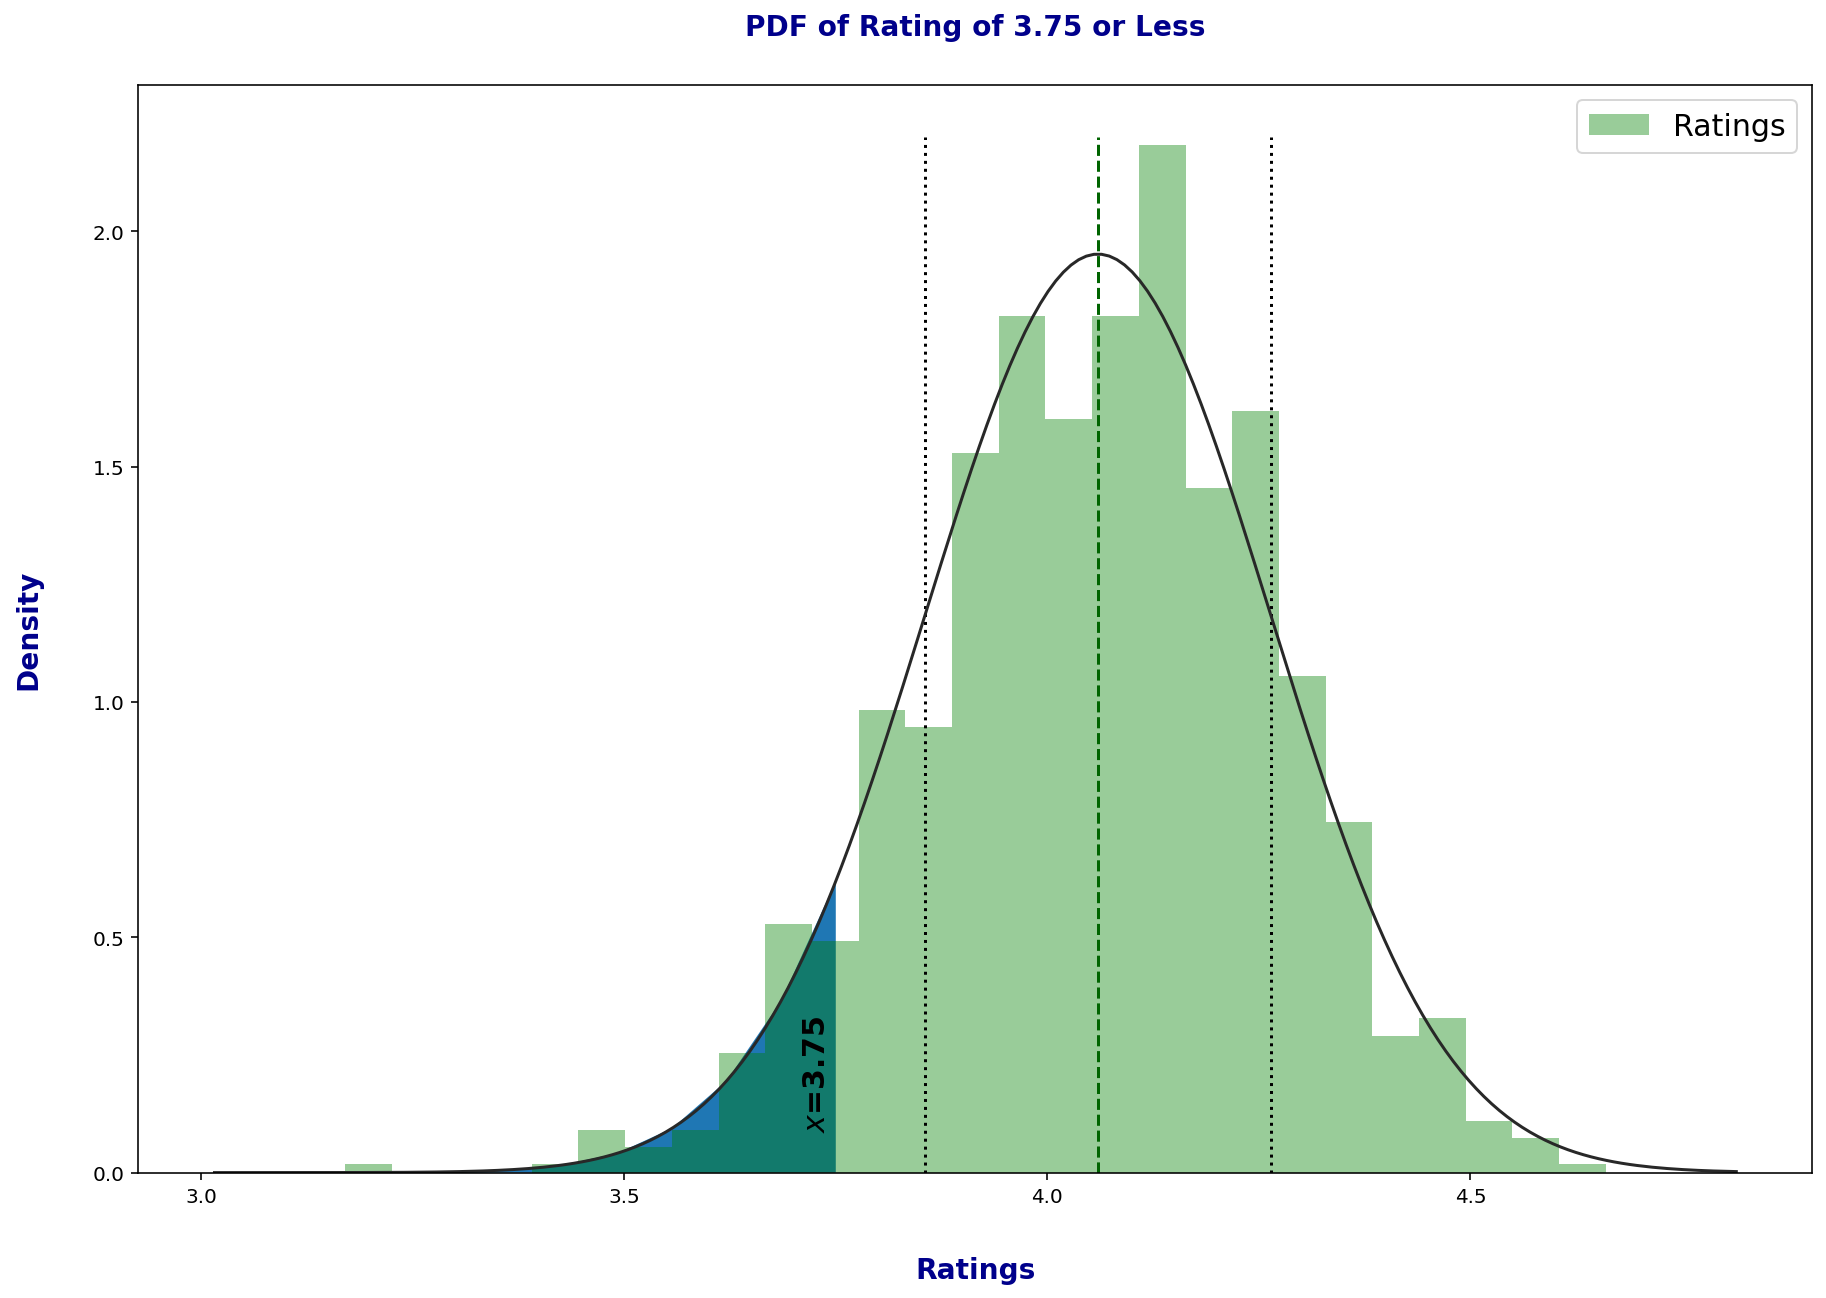

In [29]:
# First take a look at the pdf and especially the green area under
# the curve containing the probability of ratings of 3 or less.
plt.figure(figsize=(15,10))
x_ratings = 3.75
sns.distplot(df["Ratings"], label='Ratings', kde=False, 
             fit=stats.norm, color='green')
plt.text(x_ratings-0.04, .1, '$x$='+str(x_ratings), rotation='vertical', fontsize=15, fontweight='bold', color='black')

xplot_ratings = np.linspace(min(df["Ratings"]), x_ratings,10)
yplot_ratings = stats.norm.pdf(xplot_ratings, mean_ratings, population_std_ratings)
plt.fill_between(xplot_ratings,  yplot_ratings)
c=plt.legend(fontsize=15)
plt.xticks([3, 3.5, 4, 4.5, 5])
plt.vlines(x=mean_ratings, ymin=0, ymax=2.2, colors='darkgreen', linestyles='dashed', label='mean')
plt.vlines(x=mean_ratings+population_std_ratings, ymin=0, ymax=2.2, colors='black', linestyles='dotted', label='SD')
plt.vlines(x=mean_ratings-population_std_ratings, ymin=0, ymax=2.2, colors='black', linestyles='dotted', label='SD')
plt.xlabel('Ratings', labelpad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Density', labelpad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.title('PDF of Rating of 3.75 or Less', pad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.savefig('PDF_Ratings.jpg')

In [30]:
# To calculate the probability, we need the z score.
zscore_awards = (x_awards - mean_awards) / population_std_awards
zscore_awards

0.5514335873190013

In [31]:
# To calculate the probability, we need the z score.
zscore_ratings = (x_ratings - mean_ratings) / population_std_ratings
zscore_ratings

-1.5152242152189417

In [32]:
# Calculate the probability by calling stats.norm.cdf
# This is a computational z table lookup
p_awards = stats.norm.cdf(zscore_awards)
p_awards


0.7093317592335449

In [33]:
# Calculate the probability by calling stats.norm.cdf
# This is a computational z table lookup
p_ratings = stats.norm.cdf(zscore_ratings)
p_ratings

0.06485781635782467

In [34]:
# From probability back to the actual value

In [35]:
# Let's assume we have a 22% chance of a book having a certain number of awards or more.
# What is the minimum number of awards we have in this case?

In [36]:
# We use the ppf function (inverse cdf) - from probability to z score
p_awards_new = 1 - 0.22
z_awards_new = stats.norm.ppf(p_awards_new)
z_awards_new


0.7721932141886848

In [37]:
# From z score to number of awards
x_awards_new = z_awards_new * population_std_awards + mean_awards
x_awards_new

3.579203368145186

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: MatplotlibDeprecationWarning: print_figure() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


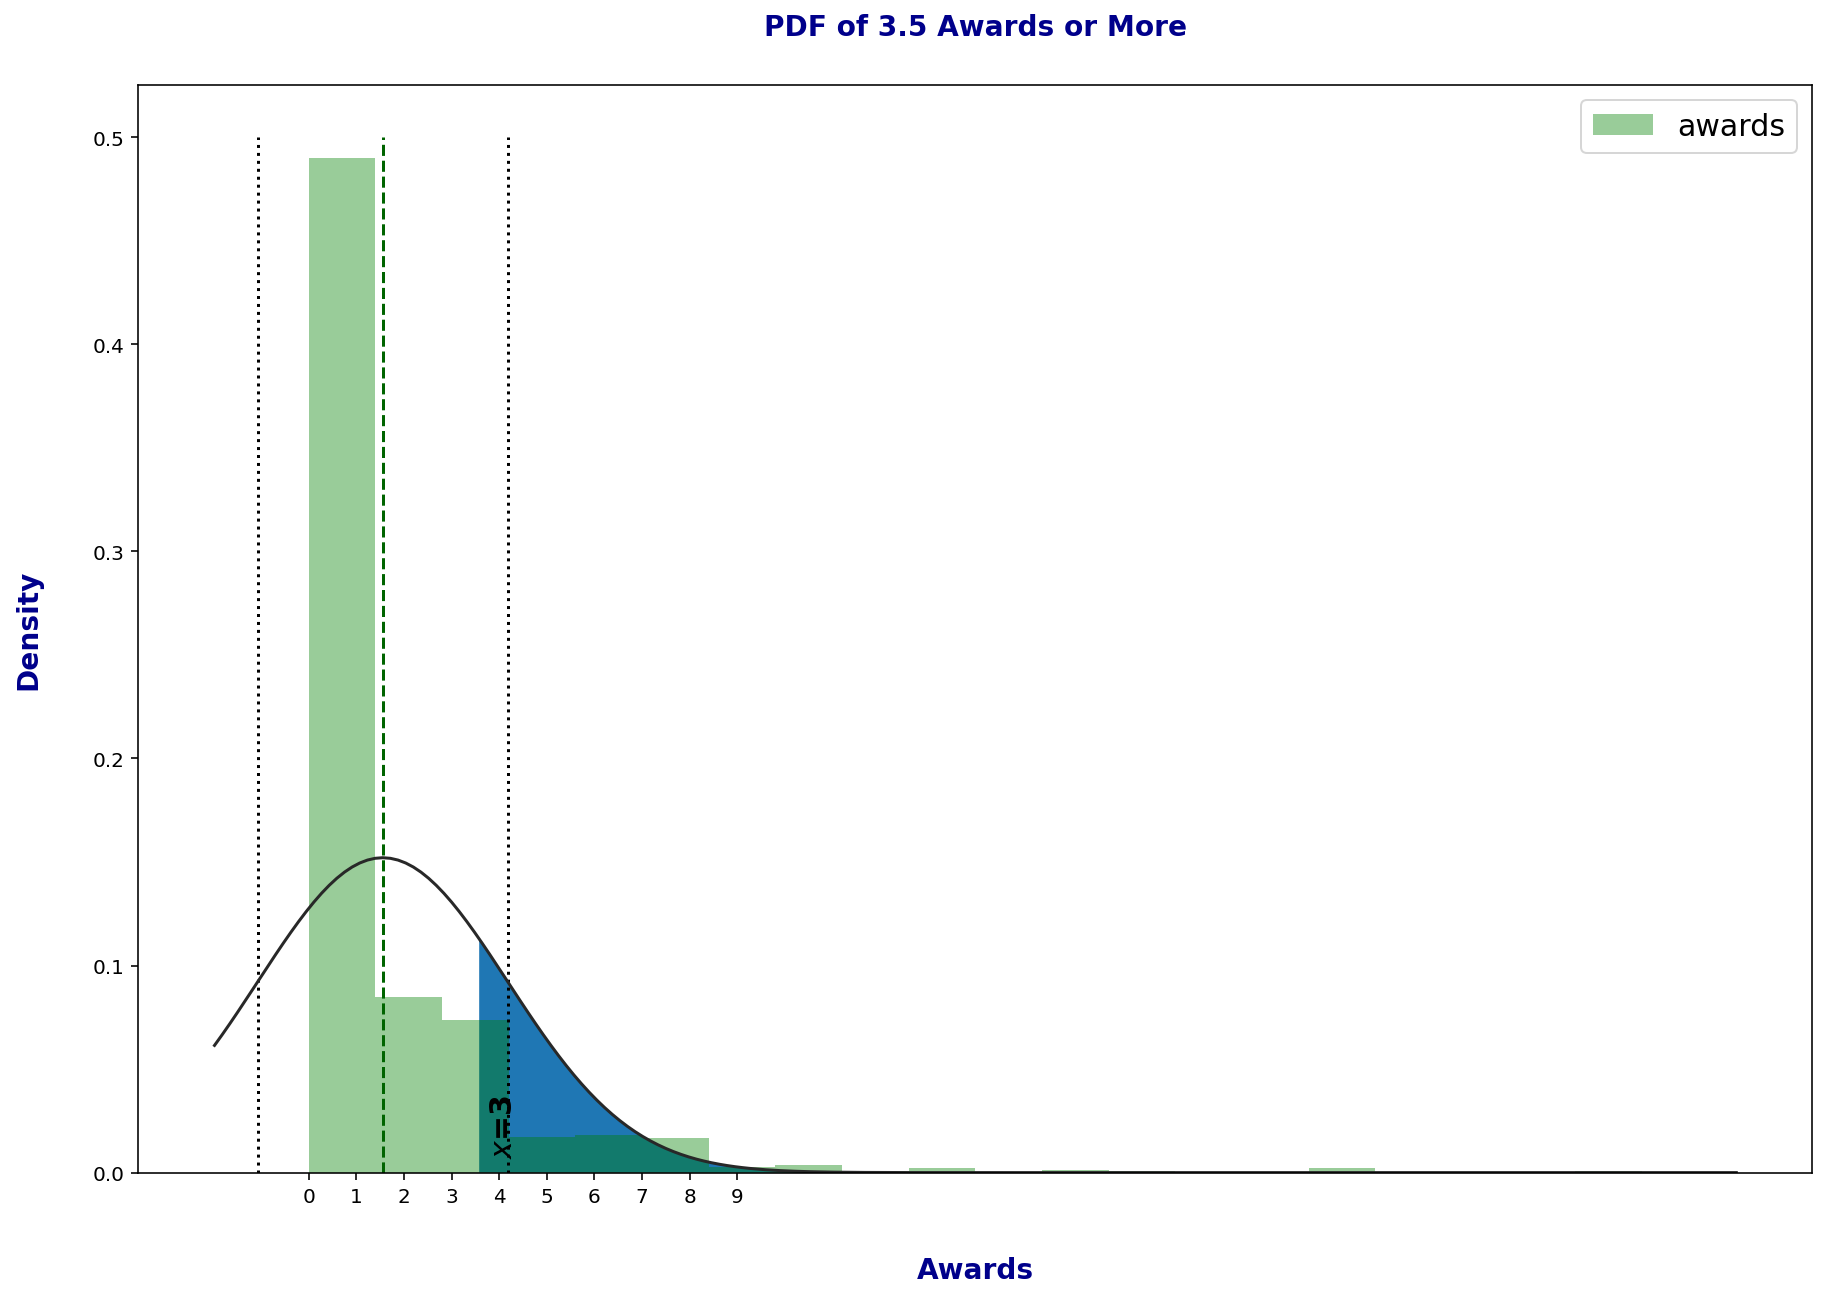

In [38]:
# The green area under the curve containing the probability 
# of (roughly) 3.5 awards or more.
plt.figure(figsize=(15,10))
sns.distplot(df["Awards"], label='awards', kde=False, fit=stats.norm, color='green', bins=20)
plt.text(x_awards_new+0.2, .01, '$x$='+str(int(x_awards_new)), rotation='vertical', fontsize=15, fontweight='bold', color='black')


xplot_awards_new = np.linspace(x_awards_new, max(df["Awards"]), 50)
yplot_awards_new = stats.norm.pdf(xplot_awards_new, mean_awards, population_std_awards)
plt.fill_between(xplot_awards_new,  yplot_awards_new)
c=plt.legend(fontsize=15)
plt.xticks(range(0, 10))
plt.vlines(x=mean_awards, ymin=0, ymax=0.5, colors='darkgreen', linestyles='dashed', label='mean')
plt.vlines(x=mean_awards+population_std_awards, ymin=0, ymax=0.5, colors='black', linestyles='dotted', label='SD')
plt.vlines(x=mean_awards-population_std_awards, ymin=0, ymax=0.5, colors='black', linestyles='dotted', label='SD')
plt.xlabel('Awards', labelpad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Density', labelpad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.title('PDF of 3.5 Awards or More', pad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.savefig('PDF_Awards2.jpg')

In [39]:
# Let's assume we have a 40% chance of a book having a certain rating or more.
# What is the minimum rating we have in this case?

In [40]:
# We use the ppf function (inverse cdf) - from probability to z score
p_ratings_new = 1 - 0.22
z_ratings_new = stats.norm.ppf(p_ratings_new)
z_ratings_new

0.7721932141886848

In [41]:
# From z score to number of awards
x_ratings_new = z_ratings_new * population_std_ratings + mean_ratings
x_ratings_new

4.2175890729573275

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: MatplotlibDeprecationWarning: print_figure() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


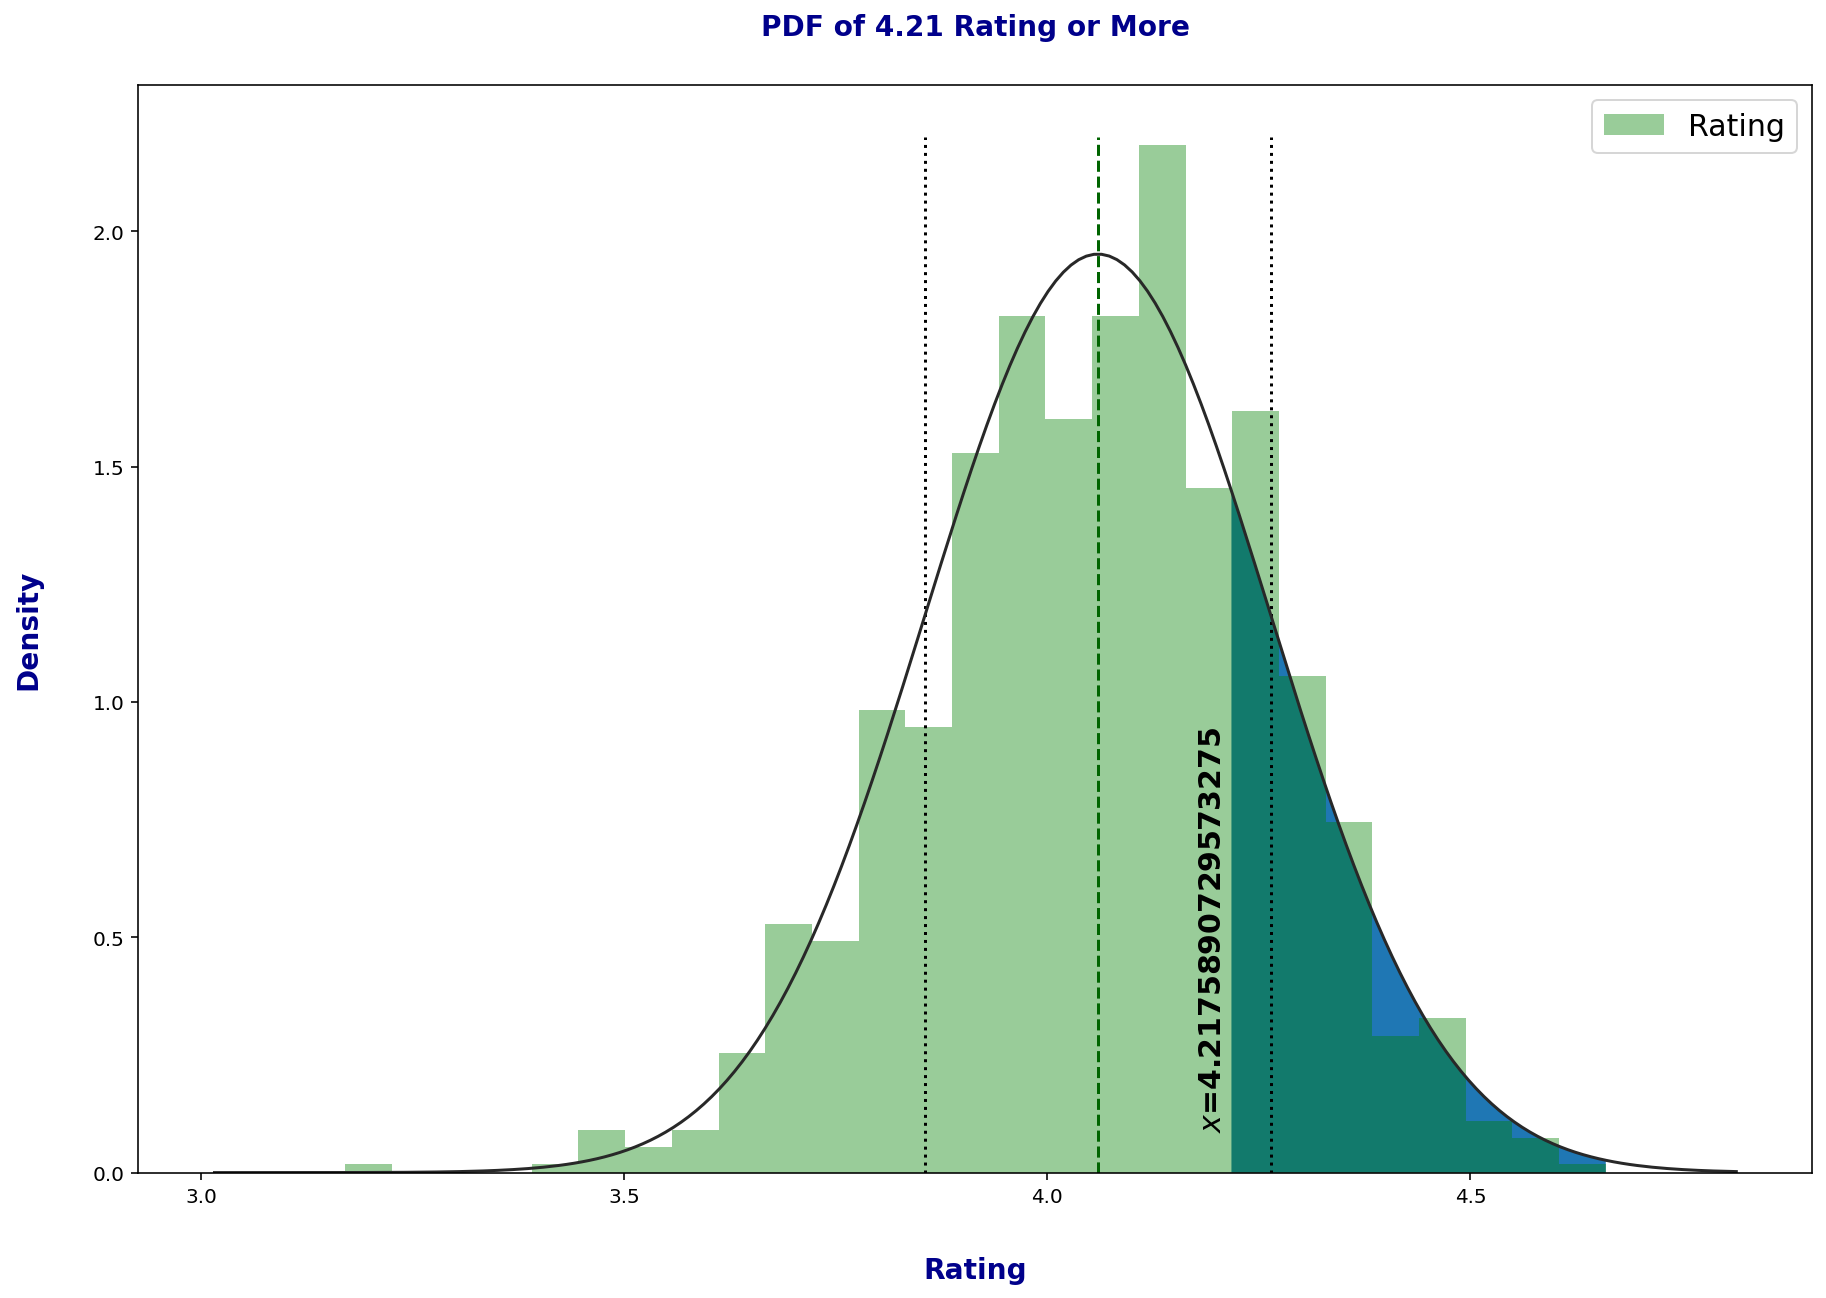

In [42]:
# The green area under the curve containing the probability 
# of (roughly) a rating of 4.21 or more.
plt.figure(figsize=(15,10))
sns.distplot(df["Ratings"], label='Rating', kde=False, fit=stats.norm, color='green')
plt.text(x_ratings_new-0.04, .1, '$x$='+str(x_ratings_new), rotation='vertical', fontsize=15, fontweight='bold', color='black')

xplot_ratings_new = np.linspace(x_ratings_new, max(df["Ratings"]), 50)
yplot_ratings_new = stats.norm.pdf(xplot_ratings_new, mean_ratings, population_std_ratings)
plt.fill_between(xplot_ratings_new,  yplot_ratings_new)
c=plt.legend(fontsize=15)
plt.xticks([3,3.5,4,4.5,5])
plt.vlines(x=mean_ratings, ymin=0, ymax=2.2, colors='darkgreen', linestyles='dashed', label='mean')
plt.vlines(x=mean_ratings+population_std_ratings, ymin=0, ymax=2.2, colors='black', linestyles='dotted', label='SD')
plt.vlines(x=mean_ratings-population_std_ratings, ymin=0, ymax=2.2, colors='black', linestyles='dotted', label='SD')
plt.xlabel('Rating', labelpad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Density', labelpad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.title('PDF of 4.21 Rating or More', pad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.savefig('PDF_Rating2.jpg')

In [43]:
# NORMAL DISTRIBUTION

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: MatplotlibDeprecationWarning: print_figure() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
 

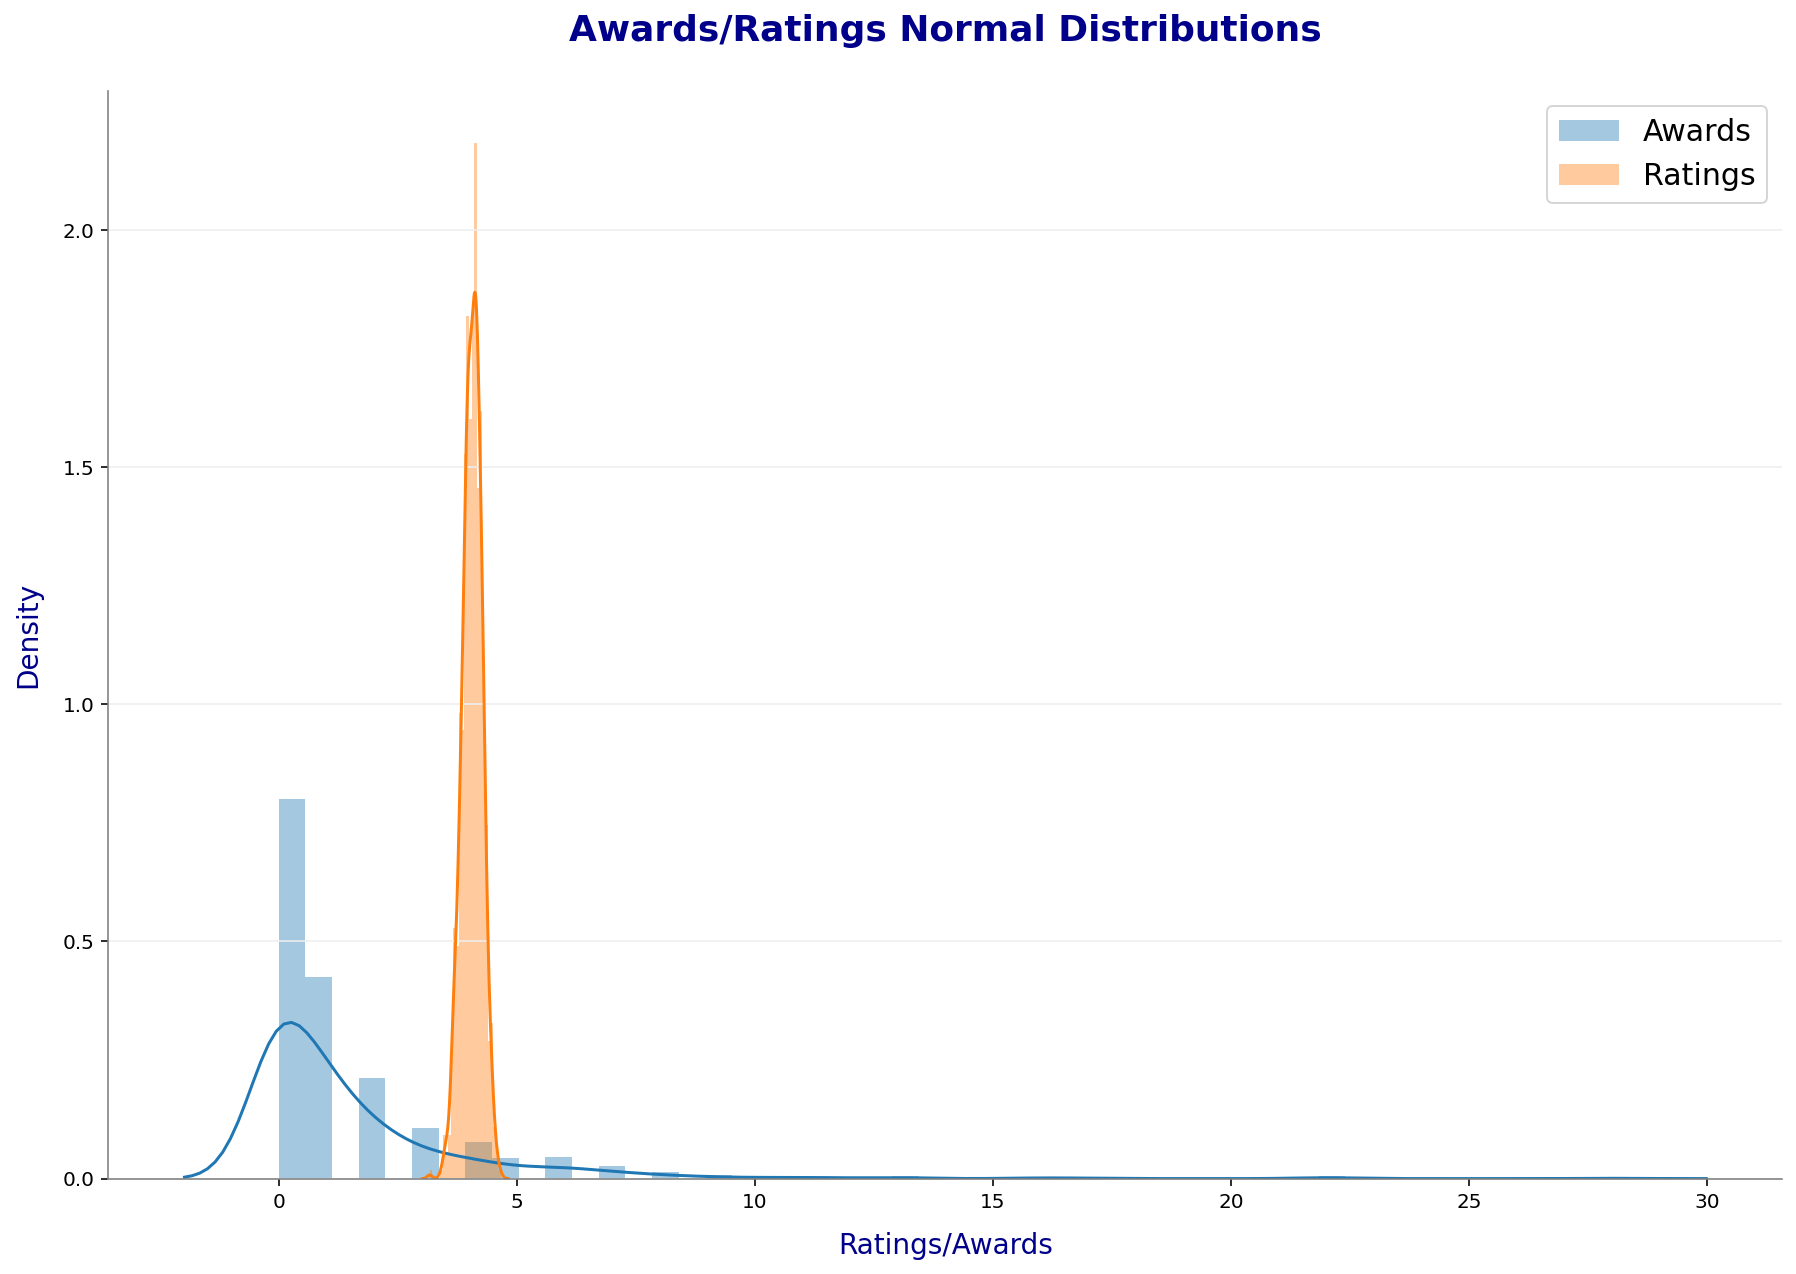

In [46]:
# Distribution plot of both normal distributions

plt.figure(figsize=(15,10))
ax = sns.distplot(df["Awards"], label='Awards')
ax = sns.distplot(df["Ratings"], label='Ratings')
c=plt.legend(fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('Grey')
ax.spines['bottom'].set_color('Grey')
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.set_xlabel('Ratings/Awards', labelpad=10, color='darkblue', fontsize=14)
ax.set_ylabel('Density', labelpad=10, color='darkblue', fontsize=14)
ax.set_title('Awards/Ratings Normal Distributions', pad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 18, 'fontweight': 'bold'})
plt.savefig('Awards_Ratings_Norms.jpg')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: MatplotlibDeprecationWarning: print_figure() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


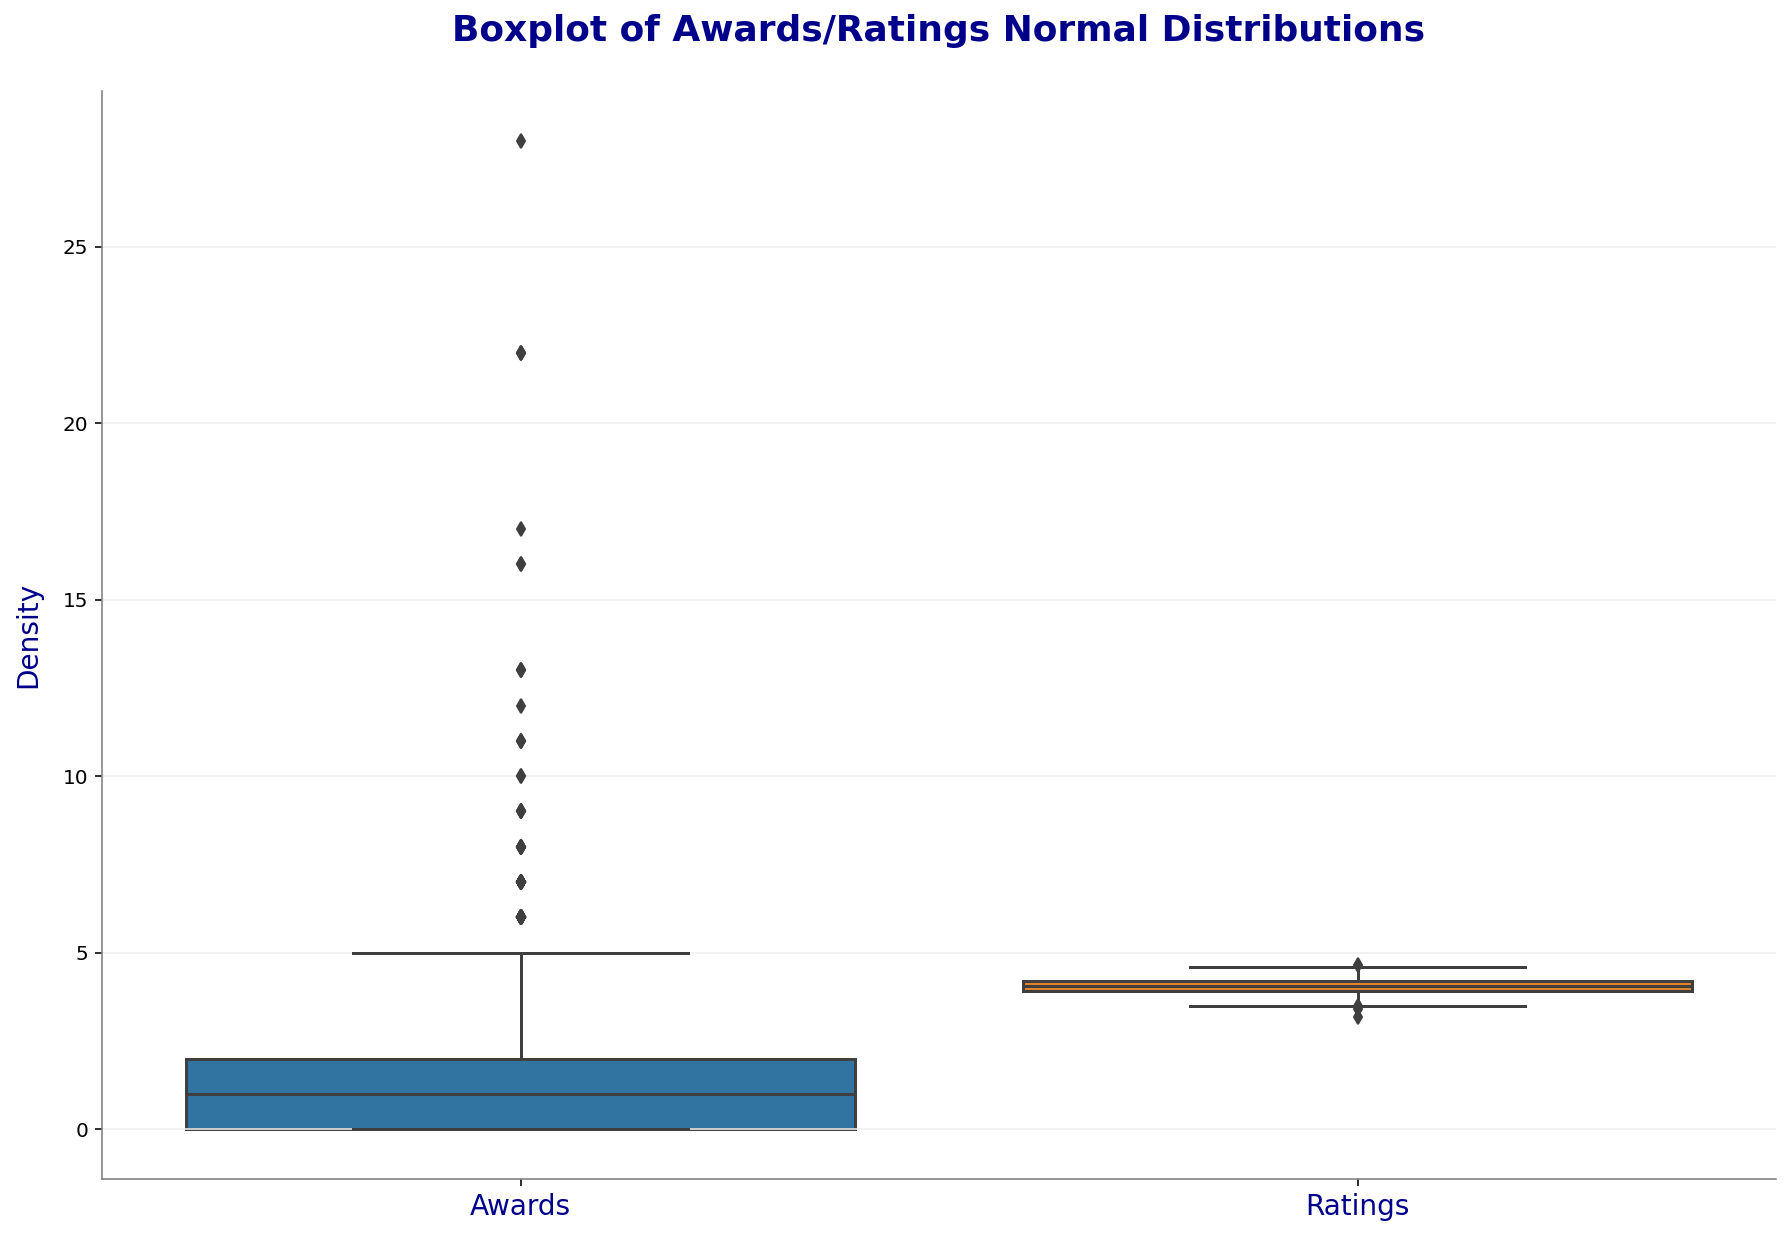

In [48]:
# Boxplot of the distributions
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=[df["Awards"], df["Ratings"]])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('Grey')
ax.spines['bottom'].set_color('Grey')
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
plt.xticks(np.arange(2), ["Awards", "Ratings"], fontsize=14, color='darkblue')
ax.set_ylabel('Density', labelpad=10, color='darkblue', fontsize=14)
ax.set_title("Boxplot of Awards/Ratings Normal Distributions", pad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 18, 'fontweight': 'bold'})
plt.savefig('Boxplot_Awards_Ratings_Norm.jpg')

In [ ]:
# The Standard Normal Distribution

In [49]:
# Calculate the z-scores for Awards array
zscores_awards_array = stats.mstats.zscore(df["Awards"])
zscores_awards_array[:10]

array([ 0.93257714,  0.17029004, -0.21085351, 10.08002229,  0.55143359,
        0.17029004, -0.21085351, -0.21085351,  0.93257714,  0.17029004])

In [50]:
# Calculate the z-scores for Ratings
zscores_ratings_array = stats.mstats.zscore(df["Ratings"])
zscores_ratings_array[:10]

array([ 1.07750369,  0.63722914, -0.63467512,  2.05589158,  1.07750369,
       -0.53683633,  0.49047096,  1.22426187, -0.34115875, -1.22170785])

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: MatplotlibDeprecationWarning: print_figure() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
 

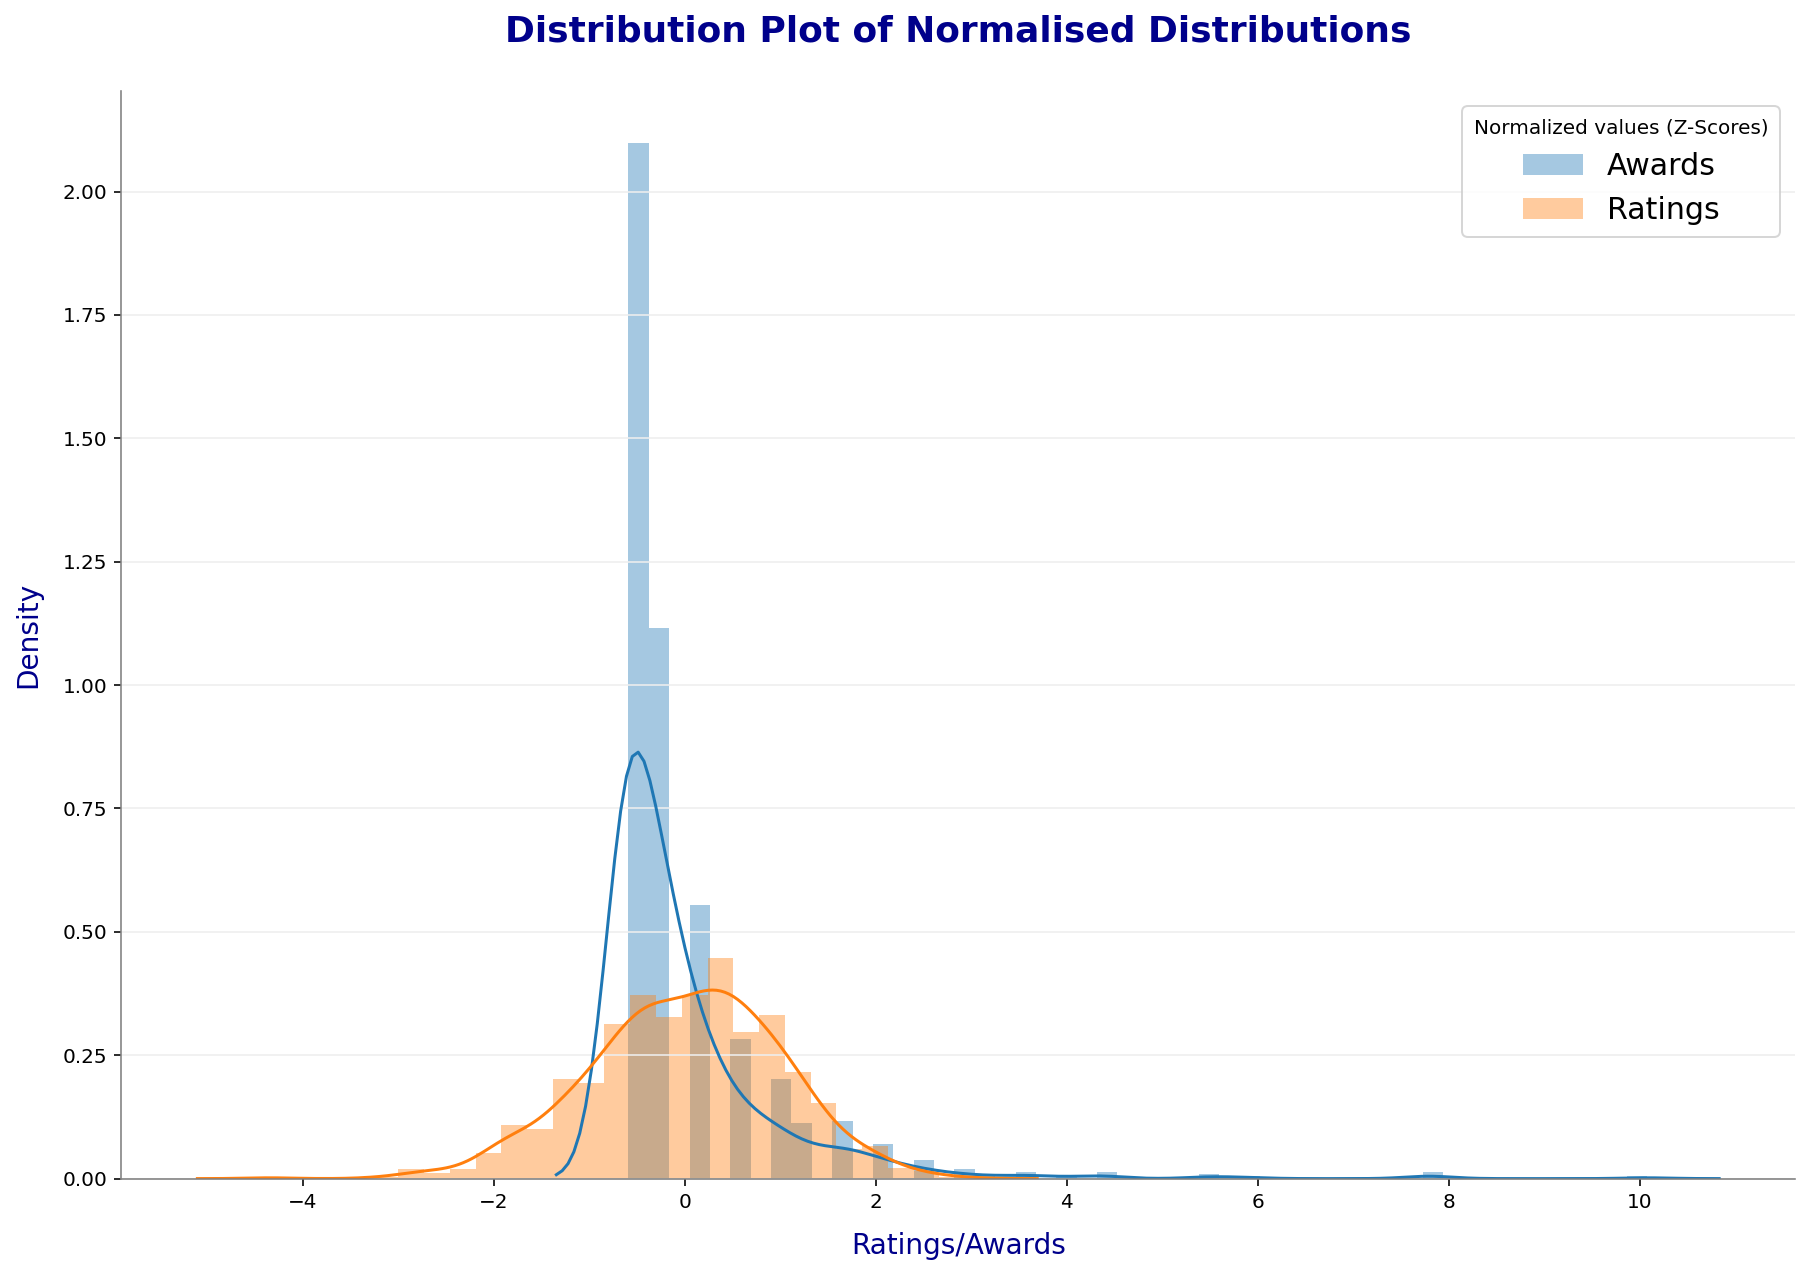

In [54]:
# Distribution plot of the normalized distributions
plt.figure(figsize=(15,10))
ax = sns.distplot(zscores_awards_array, label='Awards')
ax = sns.distplot(zscores_ratings_array, label='Ratings')
c=plt.legend(title='Normalized values (Z-Scores)', fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('Grey')
ax.spines['bottom'].set_color('Grey')
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.set_xlabel('Ratings/Awards', labelpad=10, color='darkblue', fontsize=14)
ax.set_ylabel('Density', labelpad=10, color='darkblue', fontsize=14)
ax.set_title('Distribution Plot of Normalised Distributions', pad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 18, 'fontweight': 'bold'})
plt.savefig('Dist_Plot_Norm.jpg')


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: MatplotlibDeprecationWarning: print_figure() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


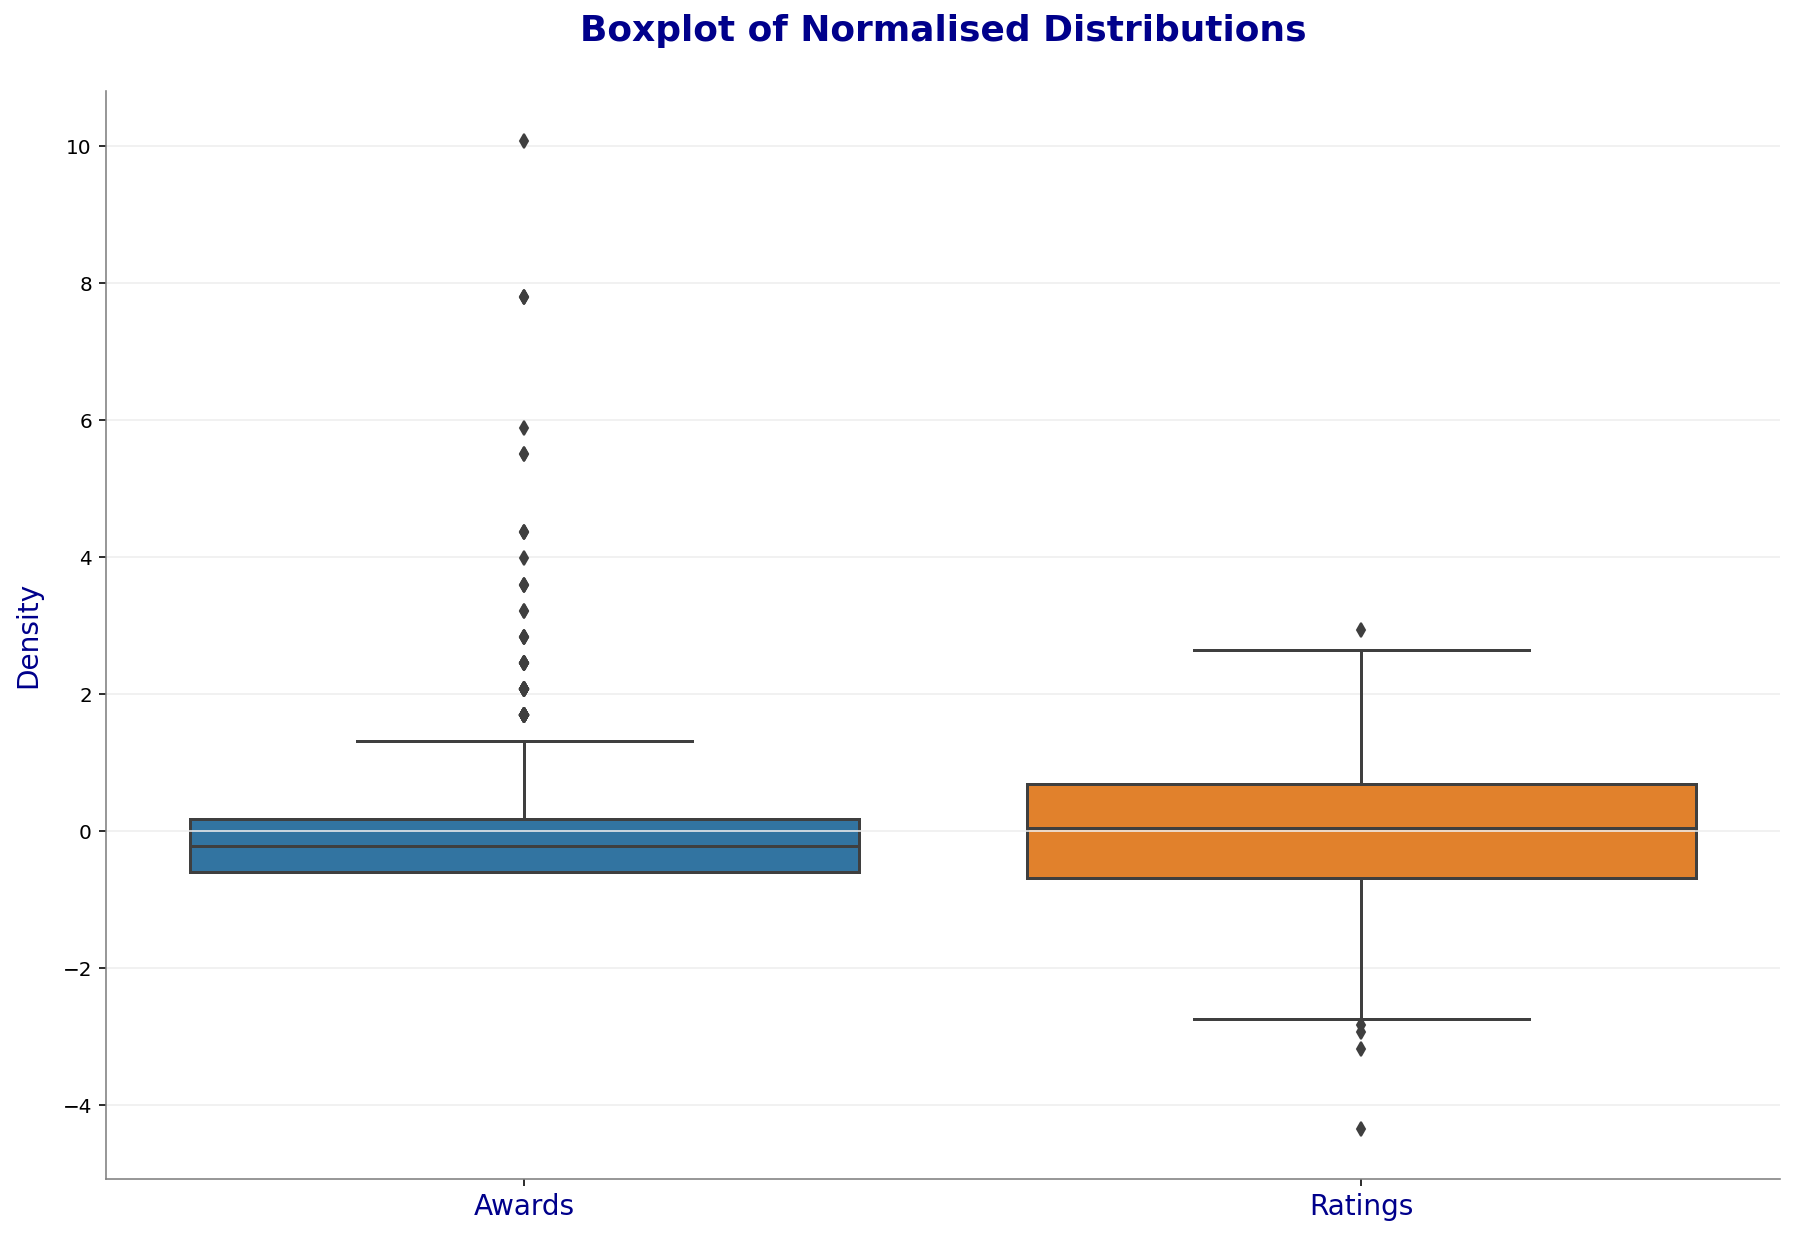

In [55]:
# Boxplot of the normalized distributions
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=[zscores_awards_array, zscores_ratings_array])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('Grey')
ax.spines['bottom'].set_color('Grey')
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
plt.xticks(np.arange(2), ["Awards", "Ratings"], fontsize=14, color='darkblue')
ax.set_ylabel('Density', labelpad=10, color='darkblue', fontsize=14)
ax.set_title("Boxplot of Normalised Distributions", pad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 18, 'fontweight': 'bold'})
plt.savefig('Boxplot_Norm_Dists.jpg')

In [57]:
# Mapping to other distributions
"""
Now we have our normalized distributions, we can do some mapping from one to the other.
Let's say I wanted to know roughly the equivalent Rating score
given an amount of Awards.
I can calculate this by using the Standard Normal Distribution (z scores).
"""


In [56]:
# First calculate the z score for my chosen amount of Awards

# 𝑧=(𝑥−𝜇)/𝜎

me_awards = 4.0
me_awards_zscore = (me_awards - mean_awards) / population_std_awards
me_awards_zscore

0.9325771355283873

In [58]:
# Than map the z score to a Ratings equivalent

# 𝑥=𝑧⋅𝜎+𝜇

me_equiv_ratings = (me_awards_zscore * population_std_ratings) + mean_ratings
me_equiv_ratings

4.250374417745014

In [59]:
# BAYES THEOREM

"""
What is the probability that a book that is part of a series has won an award?

p(award|series) = [p(series|award)*p(award)] / p(series)  --> Bayes Theorem

p(series|award) = prob_series_awards
p(award) = prob_award
p(series) = prob_series

"""

In [60]:
# aggregate all the books that are in a series and count them
df["series"] = df.series.replace({0: "No", 1: "Yes"})  
series = df.groupby(['series']).count()
series = series.rename(columns = {"Unnamed: 0":"Series Sum"})
series["Series Sum"]

series
No     645
Yes    351
Name: Series Sum, dtype: int64

In [61]:
# find proprotion of books with series
print("Proportion of books with a series:")
prob_series = 351 / (351+645)
print(prob_series)

Proportion of books with a series:
0.35240963855421686


In [62]:
# aggregate all the books that won an award and count them

df['Awards'].values[df['Awards'].values > 0] = 1
df["Awards"] = df.Awards.replace({0.0: "No", 1.0: "Yes"})  
awards = df.groupby(['Awards']).count()
awards = awards.rename(columns = {"Unnamed: 0":"Awards Sum"})
awards["Awards Sum"]

Awards
No     446
Yes    550
Name: Awards Sum, dtype: int64

In [63]:
# find proprotion of books with awards
print("Proportion of books with one or more awards:")
prob_award = 550 / (550+446)
print(prob_award)

Proportion of books with one or more awards:
0.5522088353413654


In [64]:
df["Awards"] = df.Awards.replace({0.0: "No", 1.0: "Yes"}) 
df["series"] = df.series.replace({0.0: "No", 1.0: "Yes"}) 

In [65]:
"""
To find p(series|award):
Summarize the data by calculating the number of books which have awards or not,
(Yes or No)
and giving the number of those groups which also have series:

"""

series_award = df.groupby("Awards")["series"].agg([lambda z: np.sum(z=="Yes"), "size"])
series_award.columns = ["Also With Series", "With Awards?"]
series_award

,Also With Series,With Awards?
Awards,,
No,137,446
Yes,214,550


In [66]:
"""
What is the probability that a book that is part of a series has won an award?

p(award|series) = [p(series|award)*p(award)] / p(series)  --> Bayes Theorem

"""
prob_series_award = 214/500
print("p(series|award) = ", prob_series_award)

prob_award = 550 / (550+446)
print("p(award) = ", prob_award)

prob_series = 351 / (351+645)
print("p(series) = ", prob_series)

prob_award_series = (prob_series_award * prob_award) / prob_series
print("\nTherefore,\np(award|series) = ", prob_award_series)

p(series|award) =  0.428
p(award) =  0.5522088353413654
p(series) =  0.35240963855421686

Therefore,
p(award|series) =  0.6706552706552706


In [67]:
# BAYES THEOREM

"""
What is the probability that a book that has won an award has a rating higher than 3.8?

p(rating38|award) = [p(award|rating38)*p(rating38)] / p(award)  --> Bayes Theorem

p(award|rating38) = prob_award_rating38
p(award) = prob_award
p(rating38) = prob_rating38

"""

In [68]:
# aggregate all the books that won an award and count them
awards = df.groupby(['Awards']).count()
awards = awards.rename(columns = {"Unnamed: 0":"Awards Sum"})
awards["Awards Sum"]

Awards
No     446
Yes    550
Name: Awards Sum, dtype: int64

In [69]:
df["Ratings"] = (df["Ratings"] > 3.8) * 1

In [70]:
# aggregate all the books that have a rating of more than 3.8 and count them
df["Ratings"] = df.Ratings.replace({0: "No", 1: "Yes"})
ratings = df.groupby(["Ratings"]).count()
ratings = ratings.rename(columns = {"Unnamed: 0":"Ratings>5 Sum"})
ratings["Ratings>5 Sum"]

Ratings
No     111
Yes    885
Name: Ratings>5 Sum, dtype: int64

In [71]:
# find proprotion of books with awards
print("Proportion of books with one or more awards:")
prob_award = 550 / (550+446)
print(prob_award)

Proportion of books with one or more awards:
0.5522088353413654


In [72]:
# find proprotion of books with rating higher than 3.8
print("Proportion of books with a rating higher than 3.8:")
prob_rating38 = 885 / (885+111)
print(prob_rating38)

Proportion of books with a rating higher than 3.8:
0.8885542168674698


In [73]:
"""
To find p(award|rating38):
Summarize the data by calculating the number of books which have a rating of more than 3.8
(Yes or No)
and giving the number of those groups which also have an award:
"""
award_rating38 = df.groupby("Ratings")["Awards"].agg([lambda z: np.sum(z=="Yes"), "size"])
award_rating38.columns = ["Also with Award", "Rating>3.8?"]
award_rating38

,Also with Award,Rating>3.8?
Ratings,,
No,51,111
Yes,499,885


In [74]:
"""
What is the probability that a book that has an award has a rating higher than 3.8?

p(rating38|award) = [p(award|rating38)*p(rating38)] / p(award)  --> Bayes Theorem
"""
prob_award_rating38 = 499/885
print("p(award|rating38) = ", prob_award_rating38)

prob_award = 550 / (550+446)
print("p(award) = ", prob_award)

prob_rating38 = 885 / (885+111)
print("p(rating38) = ", prob_rating38)

prob_rating38_award = (prob_award_rating38 * prob_rating38) / prob_award
print("\nTherefore,\np((rating38|award) = ", prob_rating38_award)

p(award|rating38) =  0.5638418079096045
p(award) =  0.5522088353413654
p(rating38) =  0.8885542168674698

Therefore,
p((rating38|award) =  0.9072727272727271


In [75]:
# SORTING FOR GENRES:

In [76]:
df = pd.read_csv("./resources/Books.csv")
df['Awards'] = df['Awards'].fillna(0)

max_awards = df['Awards'].max()
min_awards = df['Awards'].min()
range_of_awards = max_awards - min_awards
df['minmax_norm_awards'] = round(1 + 9*((df['Awards'] - min_awards)/range_of_awards) , 3)
mean_awards = df['Awards'].mean()
df['mean_norm_awards'] = round(1 + 9*((df['Awards'] - mean_awards)/range_of_awards) , 3)

df["Ratings"] = df["Rating Value"]
df.drop(['Rating Value'], axis=1)

,Unnamed: 0,Title,Author,Rating Count,Review Count,N pag,1st Pub,series,Genres,Awards,minmax_norm_ratings,mean_norm_ratings,Link,minmax_norm_awards,mean_norm_awards,Ratings
0,0,To Kill a Mockingbird,Harper Lee,4629082,92962,324.0,1960.0,1,"['Classics', 'Fiction', 'Historical']",4.0,7.705,7.448889,https://www.goodreads.com/book/show/2657.To_Ki...,2.286,1.786,4.28
1,1,1984,George Orwell,3250211,72375,237.0,1949.0,0,"['Classics', 'Fiction', 'Science Fiction']",2.0,7.161,6.845556,https://www.goodreads.com/book/show/40961427-1984,1.643,1.144,4.19
2,2,The Great Gatsby,F. Scott Fitzgerald,3877685,68965,200.0,1925.0,0,"['Classics', 'Fiction', 'Academic']",1.0,5.591,5.100000,https://www.goodreads.com/book/show/3.Harry_Po...,1.321,0.822,3.93
3,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,7281482,115354,309.0,1997.0,1,"['Fantasy', 'Fiction', 'Young Adult']",28.0,8.913,8.791111,https://www.goodreads.com/book/show/4671.The_G...,10.000,9.501,4.48
4,4,"The Hobbit, or There and Back Again",J.R.R. Tolkien,2973224,49547,366.0,1937.0,1,"['Fantasy', 'Classics', 'Fiction']",3.0,7.705,7.448889,https://www.goodreads.com/book/show/170448.Ani...,1.964,1.465,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,991,The Snows of Kilimanjaro and Other Stories,Ernest Hemingway,33823,1453,144.0,1961.0,0,"['Fiction', 'Short Stories', 'Classics']",0.0,5.228,4.697778,https://www.goodreads.com/book/show/244261.The...,1.000,0.501,3.87
992,992,The Street of Crocodiles,Bruno Schulz,7034,599,160.0,1933.0,0,"['Fiction', 'Short Stories', 'European Literat...",2.0,6.799,6.442222,https://www.goodreads.com/book/show/4645.The_S...,1.643,1.144,4.13
993,993,Riddley Walker,Russell Hoban,7075,819,256.0,1980.0,0,"['Fiction', 'Science Fiction', 'Apocalyptic']",3.0,6.134,5.704444,https://www.goodreads.com/book/show/428.Play_I...,1.964,1.465,4.02
994,994,Play It As It Lays,Joan Didion,29879,2278,231.0,1970.0,0,"['Fiction', 'Classics', 'Novels']",0.0,5.289,4.764444,https://www.goodreads.com/book/show/776573.Rid...,1.000,0.501,3.88


In [77]:
genres = df["Genres"].tolist()
genres = [eval(x) for x in genres]

In [78]:
for x in genres:
    if len(x)!=3:
        print(x)

['Fiction', 'Science Fiction']


In [79]:
for x in genres:
    if len(x)!=3:
        
        x.append('Fantasy')
        print(x)

['Fiction', 'Science Fiction', 'Fantasy']


In [80]:
genres_list = [re.sub("[\[\]',\"\n\s]", "", item) for sublist in genres for item in sublist]
genres_list

['Classics',
 'Fiction',
 'Historical',
 'Classics',
 'Fiction',
 'ScienceFiction',
 'Classics',
 'Fiction',
 'Academic',
 'Fantasy',
 'Fiction',
 'YoungAdult',
 'Fantasy',
 'Classics',
 'Fiction',
 'Classics',
 'Fiction',
 'ScienceFiction',
 'Nonfiction',
 'Classics',
 'History',
 'Classics',
 'Fiction',
 'Fantasy',
 'Classics',
 'Fiction',
 'ScienceFiction',
 'Classics',
 'Fiction',
 'YoungAdult',
 'Fantasy',
 'Classics',
 'Fiction',
 'Classics',
 'Fiction',
 'Historical',
 'Fiction',
 'Classics',
 'MagicalRealism',
 'Classics',
 'Fiction',
 'ScienceFiction',
 'Classics',
 'Fiction',
 'Academic',
 'Classics',
 'Historical',
 'HistoricalFiction',
 'YoungAdult',
 'Fiction',
 'Classics',
 'Fantasy',
 'YoungAdult',
 'Fiction',
 'Classics',
 'Fiction',
 'YoungAdult',
 'Classics',
 'Fiction',
 'ScienceFiction',
 'Classics',
 'Fiction',
 'Historical',
 'Classics',
 'Fiction',
 'Literature',
 'Fiction',
 'Classics',
 'ScienceFiction',
 'Classics',
 'Fiction',
 'Literature',
 'ScienceFiction'

In [81]:
title_repeated = df.Title.repeat(3).tolist()
year_repeated = df['1st Pub'].repeat(3).tolist()
awards_repeated = df.Awards.repeat(3).tolist()
ratings_repeated = df["Rating Value"].repeat(3).tolist()

big_df = pd.DataFrame({'Title': title_repeated ,'Genres': genres_list, 'Year': year_repeated, 'Awards': awards_repeated, 'Rating': ratings_repeated})
big_df['Awards'] = big_df['Awards'].fillna(0)
big_df

,Title,Genres,Year,Awards,Rating
0,To Kill a Mockingbird,Classics,1960.0,4.0,4.28
1,To Kill a Mockingbird,Fiction,1960.0,4.0,4.28
2,To Kill a Mockingbird,Historical,1960.0,4.0,4.28
3,1984,Classics,1949.0,2.0,4.19
4,1984,Fiction,1949.0,2.0,4.19
...,...,...,...,...,...
2983,Play It As It Lays,Classics,1970.0,0.0,3.88
2984,Play It As It Lays,Novels,1970.0,0.0,3.88
2985,I'm Not Stiller,Fiction,1954.0,0.0,4.06
2986,I'm Not Stiller,EuropeanLiterature,1954.0,0.0,4.06


In [82]:
genres_df = big_df.groupby("Genres")["Awards"].sum()
genres_df = genres_df.reset_index().sort_values("Awards", axis=0, ascending=False)
genres_df = genres_df.loc[genres_df["Awards"]>100]
genres_df

,Genres,Awards
37,Fiction,1257.0
20,Classics,451.0
35,Fantasy,372.0
44,Historical,298.0
103,YoungAdult,274.0
80,ScienceFiction,268.0
45,HistoricalFiction,216.0
16,Childrens,180.0
64,Nonfiction,103.0


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: MatplotlibDeprecationWarning: print_figure() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


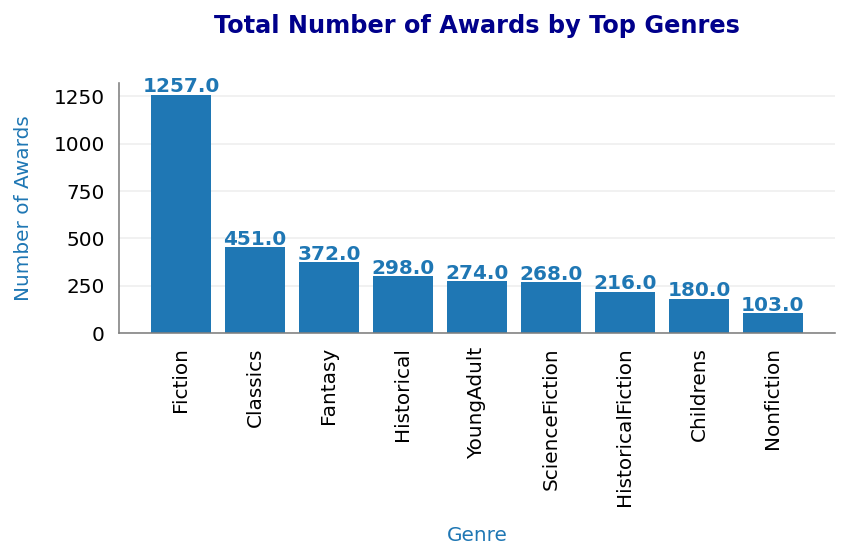

In [83]:
fig, ax = plt.subplots()
bars = ax.bar(x=genres_df["Genres"], height=genres_df["Awards"])
plt.xticks(rotation='vertical')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('Grey')
ax.spines['bottom'].set_color('Grey')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
bar_color = bars[0].get_facecolor()
for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 15,
        round(bar.get_height(), 1),
        horizontalalignment='center',
        color=bar_color,
        weight='bold'
    )
ax.set_xlabel('Genre', labelpad=10, color=bar_color)
ax.set_ylabel('Number of Awards', labelpad=10, color=bar_color)
ax.set_title('Total Number of Awards by Top Genres', pad=25, color='DarkBlue', weight='bold', fontdict={'fontsize': 12, 'fontweight': 'bold'})
fig.tight_layout()
plt.savefig('BarChartGenres_Awards.jpg')


In [84]:
genre_means = big_df.groupby("Genres").mean()
genre_means["Total"] = big_df.groupby("Genres").size()
genre_means = genre_means.reset_index().sort_values("Total", axis=0, ascending=False)
genre_means["Year"] = genre_means['Year'].fillna(method='pad').astype(int)
genre_means

,Genres,Year,Awards,Rating,Total
37,Fiction,1964,1.643137,4.036641,765
20,Classics,1948,1.013483,4.025124,445
44,Historical,1967,1.585106,4.089043,188
35,Fantasy,1976,2.583333,4.132778,144
64,Nonfiction,1966,0.817460,4.104762,126
...,...,...,...,...,...
32,Espionage,1979,1.000000,4.270000,1
53,Jewish,1969,0.000000,4.160000,1
51,IrishLiterature,1967,2.000000,4.000000,1
40,GLBT,1973,1.000000,3.920000,1


In [85]:
best_genres = genre_means.loc[genre_means["Total"]>70]
best_genres

,Genres,Year,Awards,Rating,Total
37,Fiction,1964,1.643137,4.036641,765
20,Classics,1948,1.013483,4.025124,445
44,Historical,1967,1.585106,4.089043,188
35,Fantasy,1976,2.583333,4.132778,144
64,Nonfiction,1966,0.817460,4.104762,126
45,HistoricalFiction,1974,1.770492,4.132541,122
80,ScienceFiction,1970,2.913043,4.068913,92
57,Literature,1949,0.863636,3.913068,88
16,Childrens,1958,2.432432,4.199054,74


In [86]:
fig, ax = plt.subplots()
bars = ax.bar(x=best_genres["Genres"], height=best_genres["Awards"])
plt.xticks(rotation='vertical')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('Grey')
ax.spines['bottom'].set_color('Grey')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
bar_color = bars[0].get_facecolor()
for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.3,
        round(bar.get_height(), 1),
        horizontalalignment='center',
        color=bar_color,
        weight='bold'
    )
ax.set_xlabel('Genre', labelpad=10, color=bar_color)
ax.set_ylabel('Mean Awards', labelpad=10, color=bar_color)
ax.set_title('Mean Number of Awards by Top Genres', pad=25, color='DarkBlue', fontdict={'fontsize': 12, 'fontweight': 'bold'})
fig.tight_layout()
fig.tight_layout()
plt.savefig('MeanAwardsByGenre.jpg')
